In [7]:
#Load the dataset:

import pandas as pd

file_path = 'train_df_with_new_features.csv'  # Update this with the correct path to your CSV file
train_df_new = pd.read_csv(file_path)

# Display the first few rows and summary information about the dataset
print(train_df_new.head())
print(train_df_new.info())


   policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0       0.515874        0.05             0.644231           C1   
1       0.672619        0.02             0.375000           C2   
2       0.841110        0.02             0.384615           C3   
3       0.900277        0.11             0.432692           C4   
4       0.596403        0.11             0.634615           C5   

   population_density  make segment model fuel_type     max_torque  ...  \
0                4990     1       A    M1       CNG   60Nm@3500rpm  ...   
1               27003     1       A    M1       CNG   60Nm@3500rpm  ...   
2                4076     1       A    M1       CNG   60Nm@3500rpm  ...   
3               21622     1      C1    M2    Petrol  113Nm@4400rpm  ...   
4               34738     2       A    M3    Petrol   91Nm@4250rpm  ...   

  is_central_locking is_power_steering  is_driver_seat_height_adjustable  \
0                 No               Yes                                No   


In [9]:
#Check for missing values and data types:

print(train_df_new.isnull().sum())
print(train_df_new.dtypes)


policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length                              0
width       

In [23]:
#Confirm and Extract Numerical Values and Confirm and Encode Categorical Variables
#EnsurING all necessary feature engineering is complete

import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the revised dataset
file_path = 'train_df_with_new_features.csv'  # Update this with the correct path to your CSV file
train_df_new = pd.read_csv(file_path)

# Function to extract numerical values from text columns
def extract_numerical_value(column):
    return column.astype(str).str.extract(r'(\d+\.\d+|\d+)').astype(float)

# Apply the extraction function to relevant columns
train_df_new['max_torque_num'] = extract_numerical_value(train_df_new['max_torque'])
train_df_new['max_power_num'] = extract_numerical_value(train_df_new['max_power'])

# Drop the original columns if no longer needed
train_df_new.drop(columns=['max_torque', 'max_power'], inplace=True)

# List of categorical columns
categorical_cols = ['area_cluster', 'segment', 'model', 'fuel_type', 'engine_type', 
                    'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 
                    'is_parking_camera', 'rear_brakes_type', 'transmission_type', 
                    'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper', 
                    'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 
                    'is_power_door_locks', 'is_central_locking', 'is_power_steering', 
                    'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 
                    'is_ecw', 'is_speed_alert']

# Initialize label encoder
le = LabelEncoder()

# Apply label encoder to each categorical column
for col in categorical_cols:
    train_df_new[col] = le.fit_transform(train_df_new[col])

# Display the first few rows to confirm the changes
print(train_df_new.head())


   policy_tenure  age_of_car  age_of_policyholder  area_cluster  \
0       0.515874        0.05             0.644231             0   
1       0.672619        0.02             0.375000            11   
2       0.841110        0.02             0.384615            15   
3       0.900277        0.11             0.432692            16   
4       0.596403        0.11             0.634615            17   

   population_density  make  segment  model  fuel_type  engine_type  ...  \
0                4990     1        0      0          0            6  ...   
1               27003     1        0      0          0            6  ...   
2                4076     1        0      0          0            6  ...   
3               21622     1        3      3          2            2  ...   
4               34738     2        0      4          2            0  ...   

   is_central_locking  is_power_steering  is_driver_seat_height_adjustable  \
0                   0                  1                      

In [211]:
print(train_df_new['make'])

0        1
1        1
2        1
3        1
4        2
        ..
58587    2
58588    1
58589    1
58590    1
58591    3
Name: make, Length: 58592, dtype: int64


In [25]:
print(X.columns)
# Assuming your preprocessed data is in a DataFrame named 'preprocessed_df'

# Save the DataFrame to a CSV file
train_df_new.to_csv('preprocessed_data.csv', index=False)

print("Preprocessed data saved to preprocessed_data.csv")

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder', 'area_cluster',
       'population_density', 'make', 'segment', 'model', 'fuel_type',
       'engine_type', 'airbags', 'is_esc', 'is_adjustable_steering', 'is_tpms',
       'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type',
       'displacement', 'cylinder', 'transmission_type', 'gear_box',
       'steering_type', 'turning_radius', 'length', 'width', 'height',
       'gross_weight', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'max_torque_num',
       'max_power_num', 'policyholder_age_ratio', 'car_length_to_width_ratio',
       'car_volume', 'torque_to_weight_ratio', 'power_to_weight_ratio',
       'policyholder_age_car_age_interaction'],


In [217]:
#Check for missing values and data types:

print(train_df_new.isnull().sum())
print(train_df_new.dtypes)

policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length                              0
width                               0
height                              0
gross_weight

In [27]:
# Read the saved CSV file
df = pd.read_csv('preprocessed_data.csv')

# Check data types of all columns
print(df.dtypes)

policy_tenure                       float64
age_of_car                          float64
age_of_policyholder                 float64
area_cluster                          int64
population_density                    int64
make                                  int64
segment                               int64
model                                 int64
fuel_type                             int64
engine_type                           int64
airbags                               int64
is_esc                                int64
is_adjustable_steering                int64
is_tpms                               int64
is_parking_sensors                    int64
is_parking_camera                     int64
rear_brakes_type                      int64
displacement                          int64
cylinder                              int64
transmission_type                     int64
gear_box                              int64
steering_type                         int64
turning_radius                  

In [29]:
#handling class imbalance

from sklearn.utils import resample

# Check the columns in the dataset
print(train_df_new.columns)

# Drop columns that exist in the dataset
X = train_df_new.drop(columns=['is_claim'])
y = train_df_new['is_claim']

# Combine X and y into a single DataFrame for convenience
combined_df = pd.concat([X, y], axis=1)

# Separate majority and minority classes
majority_df = combined_df[combined_df.is_claim == 0]
minority_df = combined_df[combined_df.is_claim == 1]

# Undersample the majority class
majority_df_undersampled = resample(majority_df,
                                    replace=False,  # sample without replacement
                                    n_samples=len(minority_df),  # to match minority class
                                    random_state=42)  # reproducible results

# Combine minority class with undersampled majority class
undersampled_df = pd.concat([minority_df, majority_df_undersampled])

# Separate features and target variable
X_undersampled = undersampled_df.drop(columns=['is_claim'])
y_undersampled = undersampled_df['is_claim']


Index(['policy_tenure', 'age_of_car', 'age_of_policyholder', 'area_cluster',
       'population_density', 'make', 'segment', 'model', 'fuel_type',
       'engine_type', 'airbags', 'is_esc', 'is_adjustable_steering', 'is_tpms',
       'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type',
       'displacement', 'cylinder', 'transmission_type', 'gear_box',
       'steering_type', 'turning_radius', 'length', 'width', 'height',
       'gross_weight', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim', 'max_torque_num',
       'max_power_num'],
      dtype='object')


In [31]:
#handling class imbalance

import pandas as pd
from sklearn.utils import resample
import numpy as np

# Check the columns in the dataset
#print(train_df_new.columns)

# Drop columns that exist in the dataset
#X = train_df_new.drop(columns=['is_claim'])
#y = train_df_new['is_claim']

# Combine X and y into a single DataFrame for convenience
#combined_df = pd.concat([X, y], axis=1)

# Separate majority and minority classes
majority_class = train_df_new[train_df_new['is_claim'] == 0]
minority_class = train_df_new[train_df_new['is_claim'] == 1]

# Undersample the majority class
np.random.seed(42)  # Set random seed for reproducibility
majority_downsampled = resample(majority_class,
                                replace=False,
                                n_samples=len(minority_class),
                                random_state=42)

# Combine minority class with undersampled majority class
undersampled_df = pd.concat([minority_class, majority_downsampled])

# Separate features and target variable
X_undersampled = undersampled_df.drop(columns=['is_claim'])
y_undersampled = undersampled_df['is_claim']


In [187]:
import pandas as pd

# ... (your existing code)

# Check class distribution before undersampling
print("Class distribution before undersampling:")
print(train_df_new['is_claim'].value_counts())

# ... (your undersampling code)

# Check class distribution after undersampling
print("Class distribution after undersampling:")
print(undersampled_df['is_claim'].value_counts())


Class distribution before undersampling:
is_claim
0    54844
1     3748
Name: count, dtype: int64
Class distribution after undersampling:
is_claim
1    3748
0    3748
Name: count, dtype: int64


In [189]:
#TRAINING MODELS

#Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


In [191]:
#Model Training and Evaluation

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  # Replace with your desired model
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Split the undersampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_undersampled, y_undersampled, test_size=0.2, random_state=42)

# Create and train the model
model = LogisticRegression()  # Replace with your desired model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.51      0.41      0.46       749
           1       0.51      0.60      0.55       751

    accuracy                           0.51      1500
   macro avg       0.51      0.51      0.50      1500
weighted avg       0.51      0.51      0.50      1500

[[310 439]
 [298 453]]
0.5085404596274838


C:\Users\JOELM\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
#Implementing Different Algorithms - Random Forest:

from sklearn.ensemble import RandomForestClassifier

# Create and train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_pred = rf_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, rf_pred))
print(confusion_matrix(y_test, rf_pred))
print(roc_auc_score(y_test, rf_pred))


              precision    recall  f1-score   support

           0       0.58      0.58      0.58       749
           1       0.58      0.58      0.58       751

    accuracy                           0.58      1500
   macro avg       0.58      0.58      0.58      1500
weighted avg       0.58      0.58      0.58      1500

[[438 311]
 [317 434]]
0.5813379223785287


In [45]:
#Support Vector Machine (SVM):

from sklearn.svm import SVC

# Create and train the model
svm_model = SVC()  # You can experiment with different kernels (linear, rbf, poly)
svm_model.fit(X_train, y_train)

# Make predictions on the test set
svm_pred = svm_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, svm_pred))
print(confusion_matrix(y_test, svm_pred))
print(roc_auc_score(y_test, svm_pred))


              precision    recall  f1-score   support

           0       0.52      0.20      0.28       749
           1       0.50      0.82      0.62       751

    accuracy                           0.51      1500
   macro avg       0.51      0.51      0.45      1500
weighted avg       0.51      0.51      0.45      1500

[[147 602]
 [138 613]]
0.5062533444503902


In [264]:
#Gradient Boosting (XGBoost):

import xgboost as xgb

# Create and train the model
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
xgb_pred = xgb_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, xgb_pred))
print(confusion_matrix(y_test, xgb_pred))
print(roc_auc_score(y_test, xgb_pred))


              precision    recall  f1-score   support

           0       0.58      0.55      0.56       749
           1       0.57      0.61      0.59       751

    accuracy                           0.58      1500
   macro avg       0.58      0.58      0.58      1500
weighted avg       0.58      0.58      0.58      1500

[[411 338]
 [296 455]]
0.5772952485248862


In [193]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]        # Whether bootstrap samples are used when building trees
}

# Create a RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Set up the GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search_rf.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best score for Random Forest:", grid_search_rf.best_score_)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters for Random Forest: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best score for Random Forest: 0.6062388101195441


In [195]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid_xgb = {
    'n_estimators': [100, 200, 300],      # Number of boosting rounds
    'max_depth': [3, 6, 9],               # Maximum depth of a tree
    'learning_rate': [0.01, 0.1, 0.2],    # Step size shrinkage
    'subsample': [0.8, 0.9, 1.0],         # Fraction of samples used for fitting
    'colsample_bytree': [0.8, 0.9, 1.0],  # Fraction of features used for fitting
    'gamma': [0, 0.1, 0.2]                # Regularization parameter
}

# Create an XGBClassifier
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Set up the GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search_xgb.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters for XGBoost:", grid_search_xgb.best_params_)
print("Best score for XGBoost:", grid_search_xgb.best_score_)


Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best parameters for XGBoost: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Best score for XGBoost: 0.6080725604670558


In [197]:
# For Random Forest
best_rf_model = RandomForestClassifier(
    bootstrap=True,
    max_depth=10,
    min_samples_leaf=4,
    min_samples_split=10,
    n_estimators=100,
    random_state=42
)
best_rf_model.fit(X_train, y_train)
rf_predictions = best_rf_model.predict(X_test)

# For XGBoost
best_xgb_model = xgb.XGBClassifier(
    colsample_bytree=0.8,
    gamma=0,
    learning_rate=0.01,
    max_depth=3,
    n_estimators=200,
    subsample=0.8,
    objective='binary:logistic',
    random_state=42
)
best_xgb_model.fit(X_train, y_train)
xgb_predictions = best_xgb_model.predict(X_test)


In [199]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# For Random Forest
print("Random Forest Evaluation:")
print(classification_report(y_test, rf_predictions))
print(confusion_matrix(y_test, rf_predictions))
print("ROC AUC Score:", roc_auc_score(y_test, rf_predictions))

# For XGBoost
print("XGBoost Evaluation:")
print(classification_report(y_test, xgb_predictions))
print(confusion_matrix(y_test, xgb_predictions))
print("ROC AUC Score:", roc_auc_score(y_test, xgb_predictions))


Random Forest Evaluation:
              precision    recall  f1-score   support

           0       0.63      0.55      0.59       749
           1       0.60      0.68      0.64       751

    accuracy                           0.61      1500
   macro avg       0.62      0.61      0.61      1500
weighted avg       0.62      0.61      0.61      1500

[[410 339]
 [239 512]]
ROC AUC Score: 0.614577092581498
XGBoost Evaluation:
              precision    recall  f1-score   support

           0       0.64      0.54      0.58       749
           1       0.60      0.70      0.65       751

    accuracy                           0.62      1500
   macro avg       0.62      0.62      0.61      1500
weighted avg       0.62      0.62      0.61      1500

[[401 348]
 [227 524]]
ROC AUC Score: 0.616558429437208


In [201]:
import joblib

# Save the model
joblib.dump(best_xgb_model, 'xgboost_model.pkl')

# Alternatively, you can use pickle
# import pickle
# with open('xgboost_model.pkl', 'wb') as file:
#     pickle.dump(best_xgb_model, file)


['xgboost_model.pkl']

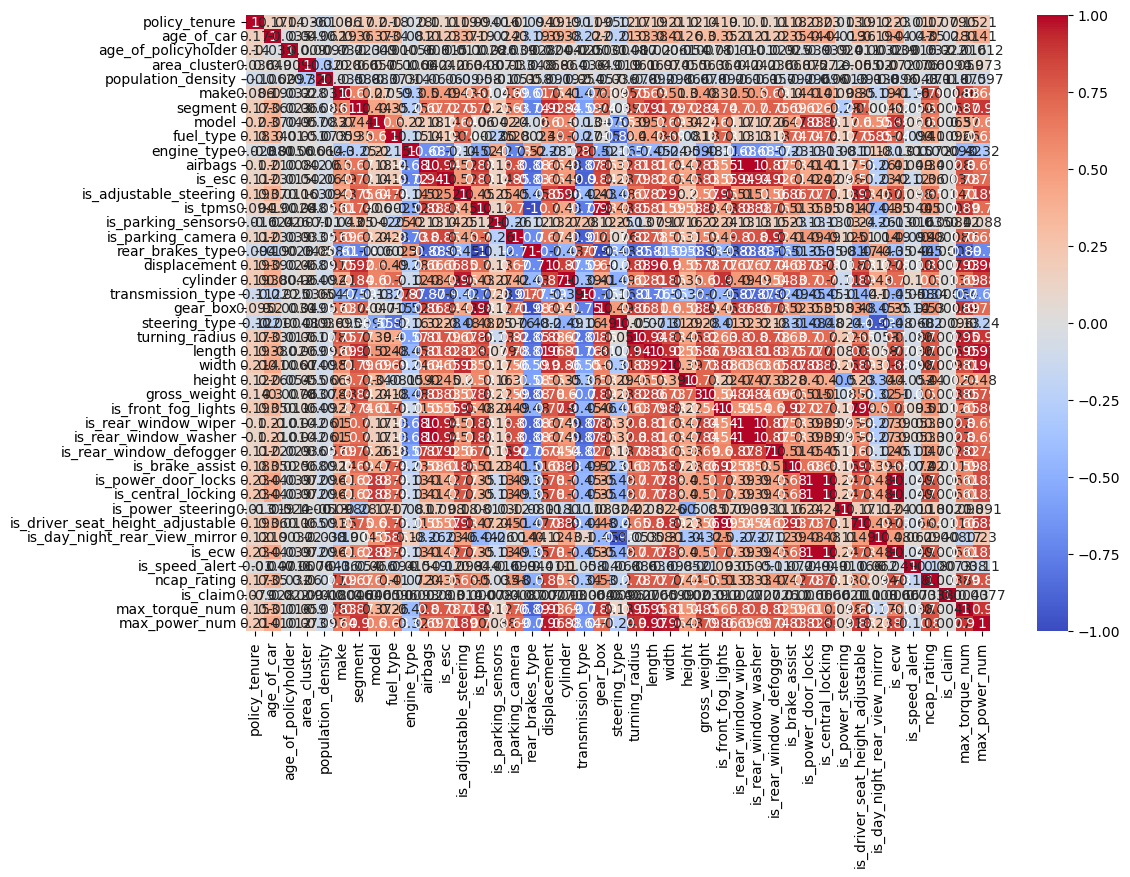

In [ ]:
#Exploratory Data Analysis (EDA) for driver behaviour and premium estimation

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'preprocessed_data.csv'
data = pd.read_csv(file_path)

# Display correlations
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# Visualize relationships
sns.pairplot(data)
plt.show()



In [1]:
#1. Synthesizing Driver Behavior

import pandas as pd
import numpy as np

# Load the dataset
file_path = 'preprocessed_data.csv'
data = pd.read_csv(file_path)

# Synthesize driver_behavior
np.random.seed(42)
data['driver_behavior'] = np.random.choice(['Safe', 'Moderate', 'Risky'], size=len(data), p=[0.6, 0.3, 0.1])

# Save the dataset with the new column
data.to_csv('data_with_driver_behavior.csv', index=False)


In [3]:
#2. Synthesizing Premium

# Function to estimate synthetic premium
def estimate_synthetic_premium(row):
    base_premium = 300
    car_age_factor = row['age_of_car'] * 5
    policyholder_age_factor = (50 - row['age_of_policyholder']) * 2
    segment_factor = {'A': 50, 'B': 100, 'C': 150}.get(row['segment'], 75)
    return base_premium + car_age_factor + policyholder_age_factor + segment_factor

# Synthesize premium
data['premium'] = data.apply(estimate_synthetic_premium, axis=1)

# Save the dataset with the new column
data.to_csv('data_with_driver_behavior_and_premium.csv', index=False)


In [96]:
#3 Model building

#3.1 Model for Driver Behavior
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load the dataset with synthesized columns
data = pd.read_csv('data_with_driver_behavior_and_premium.csv')

# Split data
X = data.drop(['driver_behavior', 'premium', 'is_claim'], axis=1)
y = data['driver_behavior']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build model
driver_behavior_model = RandomForestClassifier(random_state=42)
driver_behavior_model.fit(X_train, y_train)

# Evaluate model
y_pred = driver_behavior_model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    Moderate       0.30      0.21      0.25      3448
       Risky       0.12      0.03      0.05      1199
        Safe       0.60      0.77      0.68      7072

    accuracy                           0.53     11719
   macro avg       0.34      0.34      0.32     11719
weighted avg       0.47      0.53      0.49     11719



In [14]:
#3.2. Model for Premium Estimation

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Split data
X = data.drop(['driver_behavior', 'premium', 'is_claim'], axis=1)
y = data['premium']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build model
premium_model = RandomForestRegressor(random_state=42)
premium_model.fit(X_train, y_train)

# Evaluate model
y_pred = premium_model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))


MAE: 0.00038239676583822754
MSE: 1.9739330405114084e-05
RMSE: 0.00444289662327564


C:\Users\JOELM\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [18]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = 'preprocessed_data.csv'
data = pd.read_csv(file_path)

# Enhanced driver_behavior synthesis based on certain features
def generate_driver_behavior(row):
    if row['ncap_rating'] >= 4 and row['age_of_policyholder'] >= 25 and row['age_of_car'] <= 5:
        return 'Safe'
    elif row['ncap_rating'] >= 3 and row['age_of_policyholder'] >= 30 and row['age_of_car'] <= 10:
        return 'Moderate'
    else:
        return 'Risky'

data['driver_behavior'] = data.apply(generate_driver_behavior, axis=1)

# Save the dataset with the new column
data.to_csv('data_with_enhanced_driver_behavior.csv', index=False)


In [20]:
# Function to estimate synthetic premium with a more complex formula
def estimate_enhanced_premium(row):
    base_premium = 300
    car_age_factor = row['age_of_car'] * 5
    policyholder_age_factor = (50 - row['age_of_policyholder']) * 2
    segment_factor = {'A': 50, 'B': 100, 'C': 150}.get(row['segment'], 75)
    safety_factor = (5 - row['ncap_rating']) * 20
    return base_premium + car_age_factor + policyholder_age_factor + segment_factor + safety_factor

data['premium'] = data.apply(estimate_enhanced_premium, axis=1)

# Save the dataset with the new column
data.to_csv('data_with_enhanced_driver_behavior_and_premium.csv', index=False)


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load the dataset with synthesized columns
data = pd.read_csv('data_with_enhanced_driver_behavior_and_premium.csv')

# Split data
X = data.drop(['driver_behavior', 'premium', 'is_claim'], axis=1)
y = data['driver_behavior']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build model
driver_behavior_model = RandomForestClassifier(random_state=42)
driver_behavior_model.fit(X_train, y_train)

# Evaluate model
y_pred = driver_behavior_model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       Risky       1.00      1.00      1.00     11719

    accuracy                           1.00     11719
   macro avg       1.00      1.00      1.00     11719
weighted avg       1.00      1.00      1.00     11719



In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Split data
X = data.drop(['driver_behavior', 'premium', 'is_claim'], axis=1)
y = data['premium']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build model
premium_model = RandomForestRegressor(random_state=42)
premium_model.fit(X_train, y_train)

# Evaluate model
y_pred = premium_model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))


MAE: 0.001662113465233828
MSE: 0.00028337622209618027
RMSE: 0.016833782168490248


C:\Users\JOELM\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [26]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = 'preprocessed_data.csv'
data = pd.read_csv(file_path)

# Enhanced driver_behavior synthesis based on certain features
def generate_driver_behavior(row):
    score = (row['ncap_rating'] * 3 +
             (50 - row['age_of_policyholder']) * 0.1 +
             (15 - row['age_of_car']) * 0.2 +
             (row['airbags'] * 0.5) +
             (10 if row['is_esc'] else 0) +
             (10 if row['is_parking_sensors'] else 0) +
             (10 if row['is_parking_camera'] else 0))
    if score > 60:
        return 'Safe'
    elif score > 30:
        return 'Moderate'
    else:
        return 'Risky'

data['driver_behavior'] = data.apply(generate_driver_behavior, axis=1)

# Save the dataset with the new column
data.to_csv('data_with_revised_driver_behavior.csv', index=False)


In [28]:
# Function to estimate synthetic premium with a more complex formula
def estimate_revised_premium(row):
    base_premium = 300
    car_age_factor = row['age_of_car'] * 5
    policyholder_age_factor = (50 - row['age_of_policyholder']) * 2
    segment_factor = {'A': 50, 'B': 100, 'C': 150}.get(row['segment'], 75)
    safety_factor = (5 - row['ncap_rating']) * 20
    additional_features_factor = (10 if row['is_esc'] else 0) + (10 if row['is_parking_sensors'] else 0) + (10 if row['is_parking_camera'] else 0)
    return base_premium + car_age_factor + policyholder_age_factor + segment_factor + safety_factor + additional_features_factor

data['premium'] = data.apply(estimate_revised_premium, axis=1)

# Save the dataset with the new column
data.to_csv('data_with_revised_driver_behavior_and_premium.csv', index=False)


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load the dataset with synthesized columns
data = pd.read_csv('data_with_revised_driver_behavior_and_premium.csv')

# Encode categorical variables if necessary
data = pd.get_dummies(data, columns=['segment', 'fuel_type', 'transmission_type', 'steering_type'])

# Split data
X = data.drop(['driver_behavior', 'premium', 'is_claim'], axis=1)
y = data['driver_behavior']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build model
driver_behavior_model = RandomForestClassifier(random_state=42)
driver_behavior_model.fit(X_train, y_train)

# Evaluate model
y_pred = driver_behavior_model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    Moderate       1.00      1.00      1.00      4441
       Risky       1.00      1.00      1.00      7278

    accuracy                           1.00     11719
   macro avg       1.00      1.00      1.00     11719
weighted avg       1.00      1.00      1.00     11719



In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Split data
X = data.drop(['driver_behavior', 'premium', 'is_claim'], axis=1)
y = data['premium']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build model
premium_model = RandomForestRegressor(random_state=42)
premium_model.fit(X_train, y_train)

# Evaluate model
y_pred = premium_model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))


MAE: 0.0020989123520064367
MSE: 0.0002319424661109306
RMSE: 0.015229657452186199


C:\Users\JOELM\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [34]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('preprocessed_data.csv')

# Enhanced driver_behavior synthesis based on certain features
def generate_driver_behavior(row):
    score = (row['ncap_rating'] * 3 +
             (50 - row['age_of_policyholder']) * 0.1 +
             (15 - row['age_of_car']) * 0.2 +
             (row['airbags'] * 0.5) +
             (10 if row['is_esc'] else 0) +
             (10 if row['is_parking_sensors'] else 0) +
             (10 if row['is_parking_camera'] else 0))
    if score > 60:
        return 'Safe'
    elif score > 30:
        return 'Moderate'
    else:
        return 'Risky'

data['driver_behavior'] = data.apply(generate_driver_behavior, axis=1)

# Save the dataset with the new column
data.to_csv('data_with_revised_driver_behavior.csv', index=False)


In [38]:
# Function to estimate synthetic premium with a more complex formula
def estimate_revised_premium(row):
    base_premium = 300
    car_age_factor = row['age_of_car'] * 5
    policyholder_age_factor = (50 - row['age_of_policyholder']) * 2
    segment_factor = {'A': 50, 'B': 100, 'C': 150}.get(row['segment'], 75)
    safety_factor = (5 - row['ncap_rating']) * 20
    additional_features_factor = (10 if row['is_esc'] else 0) + (10 if row['is_parking_sensors'] else 0) + (10 if row['is_parking_camera'] else 0)
    return base_premium + car_age_factor + policyholder_age_factor + segment_factor + safety_factor + additional_features_factor

data['premium'] = data.apply(estimate_revised_premium, axis=1)

# Save the dataset with the new column
data.to_csv('data_with_revised_driver_behavior_and_premium.csv', index=False)


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load the dataset with synthesized columns
data = pd.read_csv('data_with_revised_driver_behavior_and_premium.csv')

# Encode categorical variables if necessary
data = pd.get_dummies(data, columns=['segment', 'fuel_type', 'transmission_type', 'steering_type'])

# Split data
X = data.drop(['driver_behavior', 'premium', 'is_claim'], axis=1)
y = data['driver_behavior']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build model
driver_behavior_model = RandomForestClassifier(random_state=42)
driver_behavior_model.fit(X_train, y_train)

# Evaluate model
y_pred = driver_behavior_model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    Moderate       1.00      1.00      1.00      4441
       Risky       1.00      1.00      1.00      7278

    accuracy                           1.00     11719
   macro avg       1.00      1.00      1.00     11719
weighted avg       1.00      1.00      1.00     11719



In [42]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Split data
X = data.drop(['driver_behavior', 'premium', 'is_claim'], axis=1)
y = data['premium']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build model
premium_model = RandomForestRegressor(random_state=42)
premium_model.fit(X_train, y_train)

# Evaluate model
y_pred = premium_model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))


MAE: 0.0020989123520064367
MSE: 0.0002319424661109306
RMSE: 0.015229657452186199


C:\Users\JOELM\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [44]:
# Correct way to calculate RMSE with sklearn 1.6+
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)


RMSE: 0.015229657452186199


C:\Users\JOELM\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [7]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('preprocessed_data.csv')

# Enhanced driver_behavior synthesis based on certain features with added randomness
def generate_driver_behavior(row):
    score = (row['ncap_rating'] * 3 +
             (50 - row['age_of_policyholder']) * 0.1 +
             (15 - row['age_of_car']) * 0.2 +
             (row['airbags'] * 0.5) +
             (10 if row['is_esc'] else 0) +
             (10 if row['is_parking_sensors'] else 0) +
             (10 if row['is_parking_camera'] else 0))
    
    # Add randomness
    score += np.random.normal(0, 5)
    
    if score > 60:
        return 'Safe'
    elif score > 30:
        return 'Moderate'
    else:
        return 'Risky'

data['driver_behavior'] = data.apply(generate_driver_behavior, axis=1)

# Save the dataset with the new column
data.to_csv('data_with_revised_driver_behavior.csv', index=False)


In [50]:
# Function to estimate synthetic premium with a more complex formula and added randomness
def estimate_revised_premium(row):
    base_premium = 300
    car_age_factor = row['age_of_car'] * 5
    policyholder_age_factor = (50 - row['age_of_policyholder']) * 2
    segment_factor = {'A': 50, 'B': 100, 'C': 150}.get(row['segment'], 75)
    safety_factor = (5 - row['ncap_rating']) * 20
    additional_features_factor = (10 if row['is_esc'] else 0) + (10 if row['is_parking_sensors'] else 0) + (10 if row['is_parking_camera'] else 0)
    
    # Add randomness
    randomness = np.random.normal(0, 50)
    
    return base_premium + car_age_factor + policyholder_age_factor + segment_factor + safety_factor + additional_features_factor + randomness

data['premium'] = data.apply(estimate_revised_premium, axis=1)

# Save the dataset with the new column
data.to_csv('data_with_revised_driver_behavior_and_premium.csv', index=False)


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load the dataset with synthesized columns
data = pd.read_csv('data_with_revised_driver_behavior_and_premium.csv')

# Encode categorical variables if necessary
data = pd.get_dummies(data, columns=['segment', 'fuel_type', 'transmission_type', 'steering_type'])

# Split data
X = data.drop(['driver_behavior', 'premium', 'is_claim'], axis=1)
y = data['driver_behavior']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build model
driver_behavior_model = RandomForestClassifier(random_state=42)
driver_behavior_model.fit(X_train, y_train)

# Evaluate model
y_pred = driver_behavior_model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    Moderate       0.95      0.87      0.91      4910
       Risky       0.91      0.98      0.94      6732
        Safe       0.00      0.00      0.00        77

    accuracy                           0.93     11719
   macro avg       0.62      0.62      0.62     11719
weighted avg       0.92      0.93      0.92     11719



In [54]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Split data
X = data.drop(['driver_behavior', 'premium', 'is_claim'], axis=1)
y = data['premium']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build model
premium_model = RandomForestRegressor(random_state=42)
premium_model.fit(X_train, y_train)

# Evaluate model
y_pred = premium_model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))


MAE: 41.260826478700686
MSE: 2687.4670981617132
RMSE: 51.84078604884105


C:\Users\JOELM\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [56]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the dataset
data = pd.read_csv('data_with_revised_driver_behavior_and_premium.csv')

# Encode categorical variables if necessary
data = pd.get_dummies(data, columns=['segment', 'fuel_type', 'transmission_type', 'steering_type'])

# Separate features and target
X = data.drop(['driver_behavior', 'premium', 'is_claim'], axis=1)
y = data['driver_behavior']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Build model
driver_behavior_model = RandomForestClassifier(random_state=42)
driver_behavior_model.fit(X_train_balanced, y_train_balanced)

# Evaluate model
y_pred = driver_behavior_model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    Moderate       0.94      0.83      0.88      4910
       Risky       0.91      0.97      0.94      6732
        Safe       0.03      0.10      0.05        77

    accuracy                           0.91     11719
   macro avg       0.63      0.63      0.62     11719
weighted avg       0.92      0.91      0.91     11719



In [60]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import warnings

# Suppress future warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Load the dataset
data = pd.read_csv('data_with_revised_driver_behavior_and_premium.csv')

# Encode categorical variables if necessary
data = pd.get_dummies(data, columns=['segment', 'fuel_type', 'transmission_type', 'steering_type'])

# Separate features and target
X = data.drop(['driver_behavior', 'premium', 'is_claim'], axis=1)
y = data['driver_behavior']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Train model with class weights
class_weights = {'Moderate': 1, 'Risky': 1, 'Safe': 10}  # Adjusting the weight for 'Safe'
driver_behavior_model = RandomForestClassifier(random_state=42, class_weight=class_weights)
driver_behavior_model.fit(X_train_balanced, y_train_balanced)

# Evaluate model
y_pred = driver_behavior_model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    Moderate       0.94      0.83      0.88      4910
       Risky       0.92      0.97      0.94      6732
        Safe       0.03      0.08      0.04        77

    accuracy                           0.91     11719
   macro avg       0.63      0.63      0.62     11719
weighted avg       0.92      0.91      0.91     11719



In [7]:
import pandas as pd
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import warnings

# ... (Load data and encoding as before) ...
# Suppress future warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Load the dataset
data = pd.read_csv('data_with_revised_driver_behavior_and_premium.csv')

# Encode categorical variables if necessary
data = pd.get_dummies(data, columns=['segment', 'fuel_type', 'transmission_type', 'steering_type'])

# Separate features and target
X = data.drop(['driver_behavior', 'premium', 'is_claim'], axis=1)
y = data['driver_behavior']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE for initial balancing
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# --- Determine Safe category count ---
safe_count = y_train_balanced.value_counts()['Safe']

# --- Apply RandomOverSampler with safe_count or a smaller value ---
ros_target = min(1000, safe_count)
ros = RandomOverSampler(
    sampling_strategy={'Safe': ros_target},
    random_state=42
)
X_train_ros, y_train_ros = ros.fit_resample(X_train_balanced, y_train_balanced)

# ... (Train XGBoost model and evaluate as before) ...
# Train XGBoost model
driver_behavior_model = XGBClassifier(random_state=42)
driver_behavior_model.fit(X_train_ros, y_train_ros)

# Evaluate model
y_pred_ros = driver_behavior_model.predict(X_test)
print("Classification Report with XGBoost:")
print(classification_report(y_test, y_pred_ros))

ValueError: With over-sampling methods, the number of samples in a class should be greater or equal to the original number of samples. Originally, there is 26813 samples and 1000 samples are asked.

In [9]:
import pandas as pd
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Load the dataset (make sure the path is correct)
data = pd.read_csv('data_with_revised_driver_behavior_and_premium.csv')  # Adjust the path if necessary

# Display class distribution before balancing
print("Class distribution before SMOTE:", y.value_counts())

# Encode categorical variables (if any)
data = pd.get_dummies(data, columns=['segment', 'fuel_type', 'transmission_type', 'steering_type'])  # Add any other categorical features

# Separate features and target
X = data.drop(['driver_behavior', 'premium', 'is_claim'], axis=1)  
y = data['driver_behavior']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE for initial balancing
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Display class distribution after SMOTE
print("Class distribution after SMOTE:", y_train_balanced.value_counts())

# --- Determine Safe category count AFTER SMOTE ---
safe_count = y_train_balanced.value_counts()['Safe']  

# --- Apply RandomOverSampler with safe_count or a smaller value ---
ros_target = min(1000, safe_count)  # Choose 1000 or the available safe count after SMOTE
ros = RandomOverSampler(
    sampling_strategy={'Safe': ros_target},
    random_state=42
)

# Resample data using ROS
X_train_ros, y_train_ros = ros.fit_resample(X_train_balanced, y_train_balanced)

# Display class distribution after RandomOverSampler
print("Class distribution after RandomOverSampler:", y_train_ros.value_counts())

# Train XGBoost model
driver_behavior_model = XGBClassifier(random_state=42)
driver_behavior_model.fit(X_train_ros, y_train_ros)  # Use resampled data

# Evaluate model
y_pred_ros = driver_behavior_model.predict(X_test)
print("Classification Report with XGBoost:")
print(classification_report(y_test, y_pred_ros))


Class distribution before SMOTE: driver_behavior
Risky       33545
Moderate    24695
Safe          352
Name: count, dtype: int64
Class distribution after SMOTE: driver_behavior
Moderate    26813
Risky       26813
Safe        26813
Name: count, dtype: int64


ValueError: With over-sampling methods, the number of samples in a class should be greater or equal to the original number of samples. Originally, there is 26813 samples and 1000 samples are asked.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

# Load the dataset with synthesized columns
data = pd.read_csv('data_with_driver_behavior_and_premium.csv')

# Driver Behavior Model (with cross-validation)
cv_scores_classifier = cross_val_score(RandomForestClassifier(random_state=42), X, y, cv=5, scoring='f1_weighted')
print("Driver Behavior Model (Cross-Validated F1-Weighted Score):", cv_scores_classifier.mean())
# ... (train and evaluate as before)

# Split data
X = data.drop(['driver_behavior', 'premium', 'is_claim'], axis=1)
y = data['driver_behavior']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build model
driver_behavior_model = RandomForestClassifier(random_state=42)
driver_behavior_model.fit(X_train, y_train)

# Evaluate model
y_pred = driver_behavior_model.predict(X_test)
print(classification_report(y_test, y_pred))



Driver Behavior Model (Cross-Validated F1-Weighted Score): 0.9203398016405236
              precision    recall  f1-score   support

    Moderate       0.30      0.21      0.25      3448
       Risky       0.12      0.03      0.05      1199
        Safe       0.60      0.77      0.68      7072

    accuracy                           0.53     11719
   macro avg       0.34      0.34      0.32     11719
weighted avg       0.47      0.53      0.49     11719



In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Premium Prediction Model (with cross-validation)
cv_scores_regressor = cross_val_score(RandomForestRegressor(random_state=42), X, y, cv=5, scoring='neg_mean_squared_error') 
print("Premium Prediction Model (Cross-Validated MSE):", -cv_scores_regressor.mean()) 
# ... (train and evaluate as before)

# Split data
X = data.drop(['driver_behavior', 'premium', 'is_claim'], axis=1)
y = data['premium']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build model
premium_model = RandomForestRegressor(random_state=42)
premium_model.fit(X_train, y_train)

# Evaluate model
y_pred = premium_model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\JOELM\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\JOELM\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\JOELM\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 424, in fit
    y = np.ascontiguousarray(y, dtype=DOUBLE)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'Safe'


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

# Load the dataset with synthesized columns
data = pd.read_csv('data_with_driver_behavior_and_premium.csv')

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

# ... (split data)
# Split data
X = data.drop(['driver_behavior', 'premium', 'is_claim'], axis=1)
y = data['driver_behavior']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE with a more reasonable sampling strategy
smote = SMOTE(sampling_strategy={'Safe': 0.2}, random_state=42) 
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced', None]  
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1_weighted')
grid_search.fit(X_train_resampled, y_train_resampled)

# Best model
best_model = grid_search.best_estimator_

# Evaluate best model
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))


ValueError: With over-sampling methods, the number of samples in a class should be greater or equal to the original number of samples. Originally, there is 28070 samples and 0.2 samples are asked.

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

# Separate features and target
X = data.drop(['driver_behavior', 'premium', 'is_claim'], axis=1)
y = data['driver_behavior']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Evaluate Base Model (Cross-Validation)
cv_scores_classifier = cross_val_score(RandomForestClassifier(random_state=42), X, y, cv=5, scoring='f1_weighted')
print("Base Driver Behavior Model (Cross-Validated F1-Weighted Score):", cv_scores_classifier.mean())


# 2. Apply SMOTE and Hyperparameter Tuning
# Apply SMOTE with a more reasonable sampling strategy
smote = SMOTE(sampling_strategy={'Safe': 0.2}, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced', None]  
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1_weighted')
grid_search.fit(X_train_resampled, y_train_resampled)

# Best model
best_model = grid_search.best_estimator_

# Evaluate best model
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))


Base Driver Behavior Model (Cross-Validated F1-Weighted Score): 0.4844152906824166


ValueError: With over-sampling methods, the number of samples in a class should be greater or equal to the original number of samples. Originally, there is 28070 samples and 0.2 samples are asked.

In [88]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# ... (Load data and encode as before) ...

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Evaluate Base Model (Cross-Validation)
cv_scores_classifier = cross_val_score(RandomForestClassifier(random_state=42), X_train, y_train, cv=5, scoring='f1_weighted')
print("Base Driver Behavior Model (Cross-Validated F1-Weighted Score):", cv_scores_classifier.mean())

# 2. Apply SMOTE with Target Proportion
majority_class_size = y_train.value_counts().max() 
safe_target_proportion = 0.25
total_samples_after_smote = int(majority_class_size / (1 - safe_target_proportion))
safe_target_count = int(safe_target_proportion * total_samples_after_smote)

smote = SMOTE(sampling_strategy={'Safe': safe_target_count}, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print("Class distribution after SMOTE:", y_train_resampled.value_counts())

# 3. Hyperparameter Tuning (same as before)
# ...

# 4. Best Model and Evaluation (same as before)
# ...


Base Driver Behavior Model (Cross-Validated F1-Weighted Score): 0.4851436606293583


ValueError: With over-sampling methods, the number of samples in a class should be greater or equal to the original number of samples. Originally, there is 28070 samples and 9356 samples are asked.

In [18]:
# ... (Load data and encode as before) ...
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Evaluate Base Model (Cross-Validation)
cv_scores_classifier = cross_val_score(RandomForestClassifier(random_state=42), X_train, y_train, cv=5, scoring='f1_weighted')
print("Base Driver Behavior Model (Cross-Validated F1-Weighted Score):", cv_scores_classifier.mean())

# 2. Apply SMOTE with Target Count
safe_target_proportion = 0.25
total_samples_after_smote = X_train.shape[0] * 2
max_possible_safe_count = total_samples_after_smote - 2 * y_train.value_counts().max() #Calculate max count for the Safe class
safe_target_count = int(min(safe_target_proportion * total_samples_after_smote, max_possible_safe_count))

smote = SMOTE(sampling_strategy={'Safe': safe_target_count}, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print("Class distribution after SMOTE:", y_train_resampled.value_counts())

# 3. Hyperparameter Tuning (same as before)
# ...

# 4. Best Model and Evaluation (same as before)
# ...



Base Driver Behavior Model (Cross-Validated F1-Weighted Score): 0.4851436606293583


ValueError: With over-sampling methods, the number of samples in a class should be greater or equal to the original number of samples. Originally, there is 28070 samples and 23436 samples are asked.

In [20]:
import xgboost as xgb
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report

# Load the dataset (make sure the path is correct)
data = pd.read_csv('data_with_revised_driver_behavior_and_premium.csv')  # Adjust the path if necessary

# Display class distribution before balancing
# Separate features and target
X = data.drop(['driver_behavior', 'premium', 'is_claim'], axis=1)
y = data['driver_behavior']

print("Class distribution before SMOTE:", y.value_counts())

# Encode categorical variables (if any)
data = pd.get_dummies(data, columns=['segment', 'fuel_type', 'transmission_type', 'steering_type'])  # Add any other categorical features

# Separate features and target (after encoding)
X = data.drop(['driver_behavior', 'premium', 'is_claim'], axis=1)
y = data['driver_behavior']


# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Evaluate Base Model (Cross-Validation)
cv_scores_classifier = cross_val_score(RandomForestClassifier(random_state=42), X_train, y_train, cv=5, scoring='f1_weighted')
print("Base Driver Behavior Model (Cross-Validated F1-Weighted Score):", cv_scores_classifier.mean())


# 2. Apply SMOTE 
smote = SMOTE(random_state=42)  # Use default SMOTE to balance classes
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print("Class distribution after SMOTE:", y_train_resampled.value_counts())


# XGBoost Classifier
xgb_model = xgb.XGBClassifier(
    objective='multi:softprob',  # Multiclass classification
    scale_pos_weight=10,  # Adjust this value to balance classes further
    random_state=42
)

# Hyperparameter Tuning
param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.3], 
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9],
}

grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, scoring='f1_weighted', cv=5)

# Fit on the resampled data!
grid_search_xgb.fit(X_train_resampled, y_train_resampled) 

# Best Model and Evaluation
best_xgb_model = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test)

print("Best Hyperparameters (XGBoost):", grid_search_xgb.best_params_)
print("Classification Report (XGBoost):\n", classification_report(y_test, y_pred_xgb))



Class distribution before SMOTE: driver_behavior
Risky       33545
Moderate    24695
Safe          352
Name: count, dtype: int64
Base Driver Behavior Model (Cross-Validated F1-Weighted Score): 0.9202798748967705
Class distribution after SMOTE: driver_behavior
Moderate    26813
Risky       26813
Safe        26813
Name: count, dtype: int64


ValueError: 
All the 1620 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1620 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\JOELM\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\JOELM\anaconda3\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\JOELM\anaconda3\Lib\site-packages\xgboost\sklearn.py", line 1491, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2], got ['Moderate' 'Risky' 'Safe']


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
import xgboost as xgb

# Load the dataset
data = pd.read_csv('data_with_revised_driver_behavior_and_premium.csv')

# Encode categorical variables (only once is needed)
data = pd.get_dummies(data, columns=['segment', 'fuel_type', 'transmission_type', 'steering_type'])  

# Separate features and target
X = data.drop(['driver_behavior', 'premium', 'is_claim'], axis=1)
y = data['driver_behavior']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Evaluate Base Model (Cross-Validation)
cv_scores_classifier = cross_val_score(RandomForestClassifier(random_state=42), X_train, y_train, cv=5, scoring='f1_weighted')
print("Base Driver Behavior Model (Cross-Validated F1-Weighted Score):", cv_scores_classifier.mean())

# 2. Apply SMOTE 
smote = SMOTE(random_state=42)  # Use default SMOTE to balance classes
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print("Class distribution after SMOTE:", y_train_resampled.value_counts())

# Initialize and fit LabelEncoder (after SMOTE)
label_encoder = LabelEncoder()
label_encoder.fit(y_train_resampled)

# Transform y_train_resampled and y_test
y_train_resampled_encoded = label_encoder.transform(y_train_resampled)
y_test_encoded = label_encoder.transform(y_test)

# XGBoost Classifier
xgb_model = xgb.XGBClassifier(
    objective='multi:softprob', 
    scale_pos_weight=10,  
    random_state=42
)

# Hyperparameter Tuning
param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.3], 
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9],
}

grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, scoring='f1_weighted', cv=5)

# Fit on the resampled and encoded data!
grid_search_xgb.fit(X_train_resampled, y_train_resampled_encoded) 

# Best Model and Evaluation
best_xgb_model = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test)

print("Best Hyperparameters (XGBoost):", grid_search_xgb.best_params_)
print("Classification Report (XGBoost):\n", classification_report(y_test_encoded, y_pred_xgb))


Base Driver Behavior Model (Cross-Validated F1-Weighted Score): 0.9202798748967705
Class distribution after SMOTE: driver_behavior
Moderate    26813
Risky       26813
Safe        26813
Name: count, dtype: int64


C:\Users\JOELM\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:05:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\JOELM\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:05:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\JOELM\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:05:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\JOELM\anaconda3\Lib\site-packages\xgb

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
import xgboost as xgb

# ... (Load data and encode as before) ...
data = pd.read_csv('data_with_revised_driver_behavior_and_premium.csv')
data = pd.get_dummies(data, columns=['segment', 'fuel_type', 'transmission_type', 'steering_type'])  

# Separate features and target
X = data.drop(['driver_behavior', 'premium', 'is_claim'], axis=1)
y = data['driver_behavior']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [3]:
# Apply SMOTE (using default strategy)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)



In [5]:
# Label encode the target variable after SMOTE
label_encoder = LabelEncoder()
y_train_resampled_encoded = label_encoder.fit_transform(y_train_resampled)
y_test_encoded = label_encoder.transform(y_test)

In [7]:
# XGBoost Classifier
xgb_model = xgb.XGBClassifier(
    objective='multi:softprob',  # Multiclass classification
    random_state=42,  # We are not setting scale_pos_weight manually since SMOTE handles the balance now
)

In [9]:

# Hyperparameter Tuning
param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.3], 
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9],
}

In [11]:
grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, scoring='f1_weighted', cv=5)


In [13]:
grid_search_xgb.fit(X_train_resampled, y_train_resampled_encoded)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     objective='multi:softprob', ...),
             param_grid={'colsample_bytree': [0.8, 0.9], 'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5],
                         'subsample': [0.8, 0.9]},
             scoring='f1_weighted')

In [15]:
# Best Model and Evaluation
best_xgb_model = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test)

print("Best Hyperparameters (XGBoost):", grid_search_xgb.best_params_)
print("Classification Report (XGBoost):\n", classification_report(y_test_encoded, y_pred_xgb))

Best Hyperparameters (XGBoost): {'colsample_bytree': 0.9, 'gamma': 0.1, 'learning_rate': 0.3, 'max_depth': 7, 'min_child_weight': 1, 'subsample': 0.8}
Classification Report (XGBoost):
               precision    recall  f1-score   support

           0       0.96      0.85      0.90      4910
           1       0.91      0.99      0.95      6732
           2       0.04      0.06      0.05        77

    accuracy                           0.92     11719
   macro avg       0.64      0.63      0.63     11719
weighted avg       0.93      0.92      0.92     11719



In [20]:
import pandas as pd
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import warnings

# Suppress future warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Load the dataset
data = pd.read_csv('data_with_revised_driver_behavior_and_premium.csv')

# Encode categorical variables if necessary
data = pd.get_dummies(data, columns=['segment', 'fuel_type', 'transmission_type', 'steering_type'])

# Separate features and target
X = data.drop(['driver_behavior', 'premium', 'is_claim'], axis=1)
y = data['driver_behavior']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.preprocessing import LabelEncoder

# Apply ADASYN
adasyn = ADASYN(sampling_strategy='minority', random_state=42)
X_train_balanced, y_train_balanced = adasyn.fit_resample(X_train, y_train)

# Encode the target variable
label_encoder = LabelEncoder()
y_train_balanced_encoded = label_encoder.fit_transform(y_train_balanced)
y_test_encoded = label_encoder.transform(y_test)

# Train XGBoost model with the best hyperparameters
driver_behavior_model = XGBClassifier(
    colsample_bytree=0.9,
    gamma=0.1,
    learning_rate=0.3,
    max_depth=7,
    min_child_weight=1,
    subsample=0.8,
    random_state=42
)
driver_behavior_model.fit(X_train_balanced, y_train_balanced_encoded)

# Evaluate model
y_pred_balanced = driver_behavior_model.predict(X_test)
y_pred_balanced_decoded = label_encoder.inverse_transform(y_pred_balanced)

print("Classification Report with XGBoost and ADASYN:")
print(classification_report(y_test, y_pred_balanced_decoded))


Classification Report with XGBoost and ADASYN:
              precision    recall  f1-score   support

    Moderate       0.96      0.86      0.91      4910
       Risky       0.91      0.99      0.95      6732
        Safe       0.04      0.04      0.04        77

    accuracy                           0.93     11719
   macro avg       0.64      0.63      0.63     11719
weighted avg       0.93      0.93      0.92     11719



In [32]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization, Embedding, Flatten, Input, Concatenate
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Load the dataset
data = pd.read_csv('data_with_revised_driver_behavior_and_premium.csv')

# Encode categorical variables if necessary
data = pd.get_dummies(data, columns=['segment', 'fuel_type', 'transmission_type', 'steering_type'])

# Separate features and target
X = data.drop(['driver_behavior', 'premium', 'is_claim'], axis=1)
y = data['driver_behavior']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Separate the minority class
X_train_safe = X_train[y_train == 2]
y_train_safe = y_train[y_train == 2]

# Parameters
latent_dim = 100
num_features = X_train.shape[1]

# Generator
def build_generator():
    noise = Input(shape=(latent_dim,))
    label = Input(shape=(1,), dtype='int32')
    
    label_embedding = Flatten()(Embedding(3, latent_dim)(label))
    
    model_input = Concatenate()([noise, label_embedding])
    
    x = Dense(128)(model_input)
    x = LeakyReLU(alpha=0.2)(x)
    x = BatchNormalization(momentum=0.8)(x)
    x = Dense(256)(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = BatchNormalization(momentum=0.8)(x)
    x = Dense(num_features, activation='tanh')(x)
    
    model = Model([noise, label], x)
    return model

# Discriminator
def build_discriminator():
    data_input = Input(shape=(num_features,))
    label = Input(shape=(1,), dtype='int32')
    
    label_embedding = Flatten()(Embedding(3, num_features)(label))
    
    model_input = Concatenate()([data_input, label_embedding])
    
    x = Dense(256)(model_input)
    x = LeakyReLU(alpha=0.2)(x)
    x = Dropout(0.5)(x)
    x = Dense(128)(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = Dropout(0.5)(x)
    x = Dense(1, activation='sigmoid')(x)
    
    model = Model([data_input, label], x)
    return model

# Build and compile the discriminator
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])

# Build the generator
generator = build_generator()

# GAN
noise = Input(shape=(latent_dim,))
label = Input(shape=(1,))
generated_data = generator([noise, label])

discriminator.trainable = False

validity = discriminator([generated_data, label])

combined = Model([noise, label], validity)
combined.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

# Training the GAN
epochs = 5000
batch_size = 32
save_interval = 1000

# Ensure we have enough samples for the batch
if len(X_train_safe) < batch_size:
    batch_size = len(X_train_safe)
    
# Avoid zero or negative batch size
if batch_size <= 0:
    batch_size = 1

# Generate synthetic data
for epoch in range(epochs):
    # Ensure valid batch size
    if len(X_train_safe) == 0:
        raise ValueError("No samples available for the 'Safe' category")

    idx = np.random.randint(0, X_train_safe.shape[0], batch_size)
    real_data = X_train_safe[idx]
    real_labels = np.ones((batch_size, 1))
    
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    gen_labels = np.full((batch_size, 1), 2)
    
    gen_data = generator.predict([noise, gen_labels])
    fake_labels = np.zeros((batch_size, 1))
    
    d_loss_real = discriminator.train_on_batch([real_data, gen_labels], real_labels)
    d_loss_fake = discriminator.train_on_batch([gen_data, gen_labels], fake_labels)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
    
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    valid_labels = np.ones((batch_size, 1))
    
    g_loss = combined.train_on_batch([noise, gen_labels], valid_labels)
    
    if epoch % save_interval == 0 or epoch == epochs - 1:
        print(f"{epoch} [D loss: {d_loss[0]}, acc.: {100 * d_loss[1]}] [G loss: {g_loss}]")

# Ensure generator produces valid data
if latent_dim <= 0:
    raise ValueError("Latent dimension must be positive")

noise = np.random.normal(0, 1, (5000, latent_dim))
gen_labels = np.full((5000, 1), 2)
gen_data = generator.predict([noise, gen_labels])

# Inverse transform the generated data
gen_data = scaler.inverse_transform(gen_data)

# Append synthetic data to training set
X_train_augmented = np.vstack([X_train, gen_data])
y_train_augmented = np.hstack([y_train, np.full((gen_data.shape[0],), 2)])


# Train XGBoost model with augmented data
driver_behavior_model = XGBClassifier(
    colsample_bytree=0.9,
    gamma=0.1,
    learning_rate=0.3,
    max_depth=7,
    min_child_weight=1,
    subsample=0.8,
    random_state=42
)
driver_behavior_model.fit(X_train_augmented, y_train_augmented)

# Evaluate model
y_pred = driver_behavior_model.predict(X_test)
print("Classification Report with XGBoost and cGAN Augmented Data:")
print(classification_report(y_test, y_pred))



C:\Users\JOELM\anaconda3\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


ValueError: No samples available for the 'Safe' category

In [36]:
from imblearn.over_sampling import ADASYN
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Embedding, Flatten, Concatenate, Reshape
import numpy as np

# Ensure 'Safe' category is present
safe_category_present = len(y_train[y_train == 2]) > 0
if not safe_category_present:
    raise ValueError("No samples available for the 'Safe' category")

# Define generator and discriminator models
def build_generator(latent_dim):
    model = Sequential()
    model.add(Dense(128, input_dim=latent_dim))
    model.add(Dense(256))
    model.add(Dense(X_train.shape[1]))
    return model

def build_discriminator(input_shape):
    model = Sequential()
    model.add(Dense(256, input_shape=input_shape))
    model.add(Dense(128))
    model.add(Dense(1, activation='sigmoid'))
    return model

latent_dim = 100
generator = build_generator(latent_dim)
discriminator = build_discriminator((X_train.shape[1],))
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

z = Input(shape=(latent_dim,))
label = Input(shape=(1,), dtype='int32')
label_embedding = Flatten()(Embedding(3, latent_dim)(label))
input_gen = Concatenate()([z, label_embedding])
generated_data = generator(input_gen)

discriminator.trainable = False
validity = discriminator(generated_data)

combined = Model([z, label], validity)
combined.compile(optimizer='adam', loss='binary_crossentropy')

epochs = 5000
batch_size = 32
save_interval = 1000

# Train GAN only if there are enough samples in 'Safe' category
if len(X_train_safe) > 0:
    for epoch in range(epochs):
        idx = np.random.randint(0, X_train_safe.shape[0], batch_size)
        real_data = X_train_safe[idx]
        real_labels = np.ones((batch_size, 1))

        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        gen_labels = np.full((batch_size, 1), 2)
        
        gen_data = generator.predict([noise, gen_labels])
        fake_labels = np.zeros((batch_size, 1))

        d_loss_real = discriminator.train_on_batch([real_data, gen_labels], real_labels)
        d_loss_fake = discriminator.train_on_batch([gen_data, gen_labels], fake_labels)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        valid_labels = np.ones((batch_size, 1))

        g_loss = combined.train_on_batch([noise, gen_labels], valid_labels)

        if epoch % save_interval == 0 or epoch == epochs - 1:
            print(f"{epoch} [D loss: {d_loss[0]}, acc.: {100 * d_loss[1]}] [G loss: {g_loss}]")

    # Generate synthetic 'Safe' data
    noise = np.random.normal(0, 1, (5000, latent_dim))
    gen_labels = np.full((5000, 1), 2)
    gen_data = generator.predict([noise, gen_labels])

    # Scale back the generated data
    scaler = MinMaxScaler()
    gen_data = scaler.inverse_transform(gen_data)

    # Combine original and synthetic data
    X_train_augmented = np.vstack([X_train, gen_data])
    y_train_augmented = np.hstack([y_train, np.full((gen_data.shape[0],), 2)])
else:
    print("No samples available for the 'Safe' category. Skipping GAN training.")
    X_train_augmented = X_train
    y_train_augmented = y_train

# Train the XGBoost model on the augmented dataset
xgboost_model = xgb.XGBClassifier(objective='multi:softmax', num_class=3)
xgboost_model.fit(X_train_augmented, y_train_augmented)

# Predict and evaluate the model
y_pred = xgboost_model.predict(X_test)
print("Classification Report with XGBoost and GAN augmentation:")
print(classification_report(y_test, y_pred))


ValueError: No samples available for the 'Safe' category

In [38]:
import pandas as pd

# Load the dataset
data = pd.read_csv('data_with_revised_driver_behavior_and_premium.csv')

# Check the distribution of the driver_behavior column
print("Distribution of Driver Behavior:")
print(data['driver_behavior'].value_counts())

# Filter the data for the 'Safe' category
safe_data = data[data['driver_behavior'] == 'Safe']

# Display the number of samples and some of the samples in the 'Safe' category
print("\nNumber of 'Safe' samples:", len(safe_data))
print(safe_data.head())

# Check if any columns have missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())

# Check the datatypes of the columns
print("\nData types of the columns:")
print(data.dtypes)


Distribution of Driver Behavior:
driver_behavior
Risky       33545
Moderate    24695
Safe          352
Name: count, dtype: int64

Number of 'Safe' samples: 352
     policy_tenure  age_of_car  age_of_policyholder  area_cluster  \
162       0.032287        0.07             0.548077            17   
203       0.085196        0.12             0.471154            11   
403       1.037660        0.22             0.807692            20   
687       0.011722        0.12             0.394231             4   
862       1.070252        0.04             0.509615             2   

     population_density  make  segment  model  fuel_type  engine_type  ...  \
162               34738     3        4      5          1            3  ...   
203               27003     4        3      2          2            5  ...   
403                8794     3        4      5          1            3  ...   
687                5410     3        4      5          1            3  ...   
862                6108     3      

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('data_with_revised_driver_behavior_and_premium.csv')

# Check the distribution of the driver_behavior column
print("Distribution of Driver Behavior:")
print(data['driver_behavior'].value_counts())

# Ensure 'driver_behavior' is correctly encoded
print("\nUnique values in 'driver_behavior':")
print(data['driver_behavior'].unique())

# Filter the data for the 'Safe' category
safe_data = data[data['driver_behavior'] == 'Safe']

# Display the number of samples and some of the samples in the 'Safe' category
print("\nNumber of 'Safe' samples:", len(safe_data))
print(safe_data.head())

# Split the data
X = data.drop(columns=['driver_behavior'])
y = data['driver_behavior']

# Verify the shape and head of the dataset
print("\nShape of X:", X.shape)
print("Shape of y:", y.shape)
print("First few rows of X:\n", X.head())
print("First few rows of y:\n", y.head())

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Verify the distribution in the training set
print("\nDistribution in training set:")
print(y_train.value_counts())

# Example: Debug the noise and label generation process for the GAN
latent_dim = 100
batch_size = 32

# Create noise and labels
noise = np.random.normal(0, 1, (batch_size, latent_dim))
gen_labels = np.full((batch_size, 1), 'Safe')

print("\nNoise shape:", noise.shape)
print("Generated labels shape:", gen_labels.shape)

# Assuming you have a generator model defined somewhere
# Check if the generator model can handle the input data
try:
    gen_data = generator.predict([noise, gen_labels])
    print("\nGenerated data shape:", gen_data.shape)
except Exception as e:
    print("\nError during generator prediction:", e)

# Verify if the data passed to the discriminator has the correct shape
try:
    d_loss_real = discriminator.train_on_batch([X_train.values[:batch_size], y_train.values[:batch_size]], np.ones((batch_size, 1)))
    print("\nDiscriminator training on real data successful.")
except Exception as e:
    print("\nError during discriminator training:", e)


Distribution of Driver Behavior:
driver_behavior
Risky       33545
Moderate    24695
Safe          352
Name: count, dtype: int64

Unique values in 'driver_behavior':
['Risky' 'Moderate' 'Safe']

Number of 'Safe' samples: 352
     policy_tenure  age_of_car  age_of_policyholder  area_cluster  \
162       0.032287        0.07             0.548077            17   
203       0.085196        0.12             0.471154            11   
403       1.037660        0.22             0.807692            20   
687       0.011722        0.12             0.394231             4   
862       1.070252        0.04             0.509615             2   

     population_density  make  segment  model  fuel_type  engine_type  ...  \
162               34738     3        4      5          1            3  ...   
203               27003     4        3      2          2            5  ...   
403                8794     3        4      5          1            3  ...   
687                5410     3        4      5   

In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential, Model
from keras.layers import Dense, Input, Embedding, Flatten, Concatenate
from keras.optimizers import Adam

# Load the dataset
data = pd.read_csv('data_with_revised_driver_behavior_and_premium.csv')

# Encode the 'driver_behavior' column
label_encoder = LabelEncoder()
data['driver_behavior_encoded'] = label_encoder.fit_transform(data['driver_behavior'])

# Check the distribution of the driver_behavior_encoded column
print("Distribution of Encoded Driver Behavior:")
print(data['driver_behavior_encoded'].value_counts())

# Filter the data for the 'Safe' category
safe_data = data[data['driver_behavior'] == 'Safe']

# Display the number of samples and some of the samples in the 'Safe' category
print("\nNumber of 'Safe' samples:", len(safe_data))
print(safe_data.head())

# Split the data
X = data.drop(columns=['driver_behavior', 'driver_behavior_encoded'])
y = data['driver_behavior_encoded']

# Verify the shape and head of the dataset
print("\nShape of X:", X.shape)
print("Shape of y:", y.shape)
print("First few rows of X:\n", X.head())
print("First few rows of y:\n", y.head())

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Verify the distribution in the training set
print("\nDistribution in training set:")
print(y_train.value_counts())

# Define latent dimension and batch size
latent_dim = 100
batch_size = 32

# Create noise and labels
noise = np.random.normal(0, 1, (batch_size, latent_dim))
gen_labels = np.full((batch_size,), 2)  # Use the numerical encoding for 'Safe'

print("\nNoise shape:", noise.shape)
print("Generated labels shape:", gen_labels.shape)

# Assuming you have defined a generator and discriminator model earlier

# Example of generator and discriminator model definition (update as needed)
def build_generator(latent_dim, num_classes):
    noise_input = Input(shape=(latent_dim,))
    label_input = Input(shape=(1,), dtype='int32')
    label_embedding = Embedding(num_classes, latent_dim, input_length=1)(label_input)
    label_embedding = Flatten()(label_embedding)
    model_input = Concatenate()([noise_input, label_embedding])
    x = Dense(128, activation='relu')(model_input)
    x = Dense(X_train.shape[1], activation='tanh')(x)
    generator = Model([noise_input, label_input], x)
    return generator

def build_discriminator(input_dim, num_classes):
    data_input = Input(shape=(input_dim,))
    label_input = Input(shape=(1,), dtype='int32')
    label_embedding = Embedding(num_classes, input_dim, input_length=1)(label_input)
    label_embedding = Flatten()(label_embedding)
    model_input = Concatenate()([data_input, label_embedding])
    x = Dense(128, activation='relu')(model_input)
    x = Dense(1, activation='sigmoid')(x)
    discriminator = Model([data_input, label_input], x)
    return discriminator

# Define the generator and discriminator
generator = build_generator(latent_dim, num_classes=len(label_encoder.classes_))
discriminator = build_discriminator(X_train.shape[1], num_classes=len(label_encoder.classes_))

# Compile the discriminator
discriminator.compile(optimizer=Adam(0.0002, 0.5), loss='binary_crossentropy', metrics=['accuracy'])

# Check if the generator model can handle the input data
try:
    gen_data = generator.predict([noise, gen_labels])
    print("\nGenerated data shape:", gen_data.shape)
except Exception as e:
    print("\nError during generator prediction:", e)

# Verify if the data passed to the discriminator has the correct shape
try:
    d_loss_real = discriminator.train_on_batch([X_train.values[:batch_size], y_train.values[:batch_size]], np.ones((batch_size, 1)))
    print("\nDiscriminator training on real data successful.")
except Exception as e:
    print("\nError during discriminator training:", e)


Distribution of Encoded Driver Behavior:
driver_behavior_encoded
1    33545
0    24695
2      352
Name: count, dtype: int64

Number of 'Safe' samples: 352
     policy_tenure  age_of_car  age_of_policyholder  area_cluster  \
162       0.032287        0.07             0.548077            17   
203       0.085196        0.12             0.471154            11   
403       1.037660        0.22             0.807692            20   
687       0.011722        0.12             0.394231             4   
862       1.070252        0.04             0.509615             2   

     population_density  make  segment  model  fuel_type  engine_type  ...  \
162               34738     3        4      5          1            3  ...   
203               27003     4        3      2          2            5  ...   
403                8794     3        4      5          1            3  ...   
687                5410     3        4      5          1            3  ...   
862                6108     3        4  

C:\Users\JOELM\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step

Generated data shape: (32, 44)

Discriminator training on real data successful.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
from sklearn.utils.class_weight import compute_class_weight 

# 1. Load and Preprocess Data
data = pd.read_csv('data_with_revised_driver_behavior_and_premium.csv')

# Encode categorical variables
data = pd.get_dummies(data, columns=['segment', 'fuel_type', 'transmission_type', 'steering_type']) 

# Separate features and target
X = data.drop(['driver_behavior', 'premium', 'is_claim'], axis=1)
y = data['driver_behavior']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Apply SMOTE 
smote = SMOTE(random_state=42)  
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Label encode the target variable after SMOTE
label_encoder = LabelEncoder()
y_train_resampled_encoded = label_encoder.fit_transform(y_train_resampled)
y_test_encoded = label_encoder.transform(y_test)


# 3. Train and Evaluate XGBoost Model (using your existing best model or retrain if needed)

# Calculate class weights manually 
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_resampled_encoded), y=y_train_resampled_encoded)
class_weight_dict = dict(enumerate(class_weights))

# XGBoost Classifier with class weights
xgb_model = xgb.XGBClassifier(
    objective='multi:softprob',  
    random_state=42,  
    class_weight=class_weight_dict
)

# Fit the model (assuming you have 'best_xgb_model' from previous tuning)
# Or, retrain with hyperparameter tuning if needed
xgb_model.fit(X_train_resampled, y_train_resampled_encoded)

# Evaluate model
y_pred_xgb = xgb_model.predict(X_test)
print("Classification Report (XGBoost):\n", classification_report(y_test_encoded, y_pred_xgb))


# 4. Prepare Data for Premium Estimation
X_premium_train = X_train.copy() 
X_premium_test = X_test.copy()

# Use the XGBoost model to predict driver behavior
X_premium_train['predicted_driver_behavior'] = xgb_model.predict(X_train)
X_premium_test['predicted_driver_behavior'] = xgb_model.predict(X_test)

# Encode the predicted driver behavior
label_encoder_premium = LabelEncoder()
X_premium_train['predicted_driver_behavior'] = label_encoder_premium.fit_transform(X_premium_train['predicted_driver_behavior'])
X_premium_test['predicted_driver_behavior'] = label_encoder_premium.transform(X_premium_test['predicted_driver_behavior'])
`b
# Separate the target variable for premium estimation
y_premium_train = data['premium'][y_train.index]  # Align with X_train
y_premium_test = data['premium'][y_test.index]    # Align with X_test


# 5. Build and Evaluate Premium Estimation Model
premium_model = RandomForestRegressor(random_state=42)
premium_model.fit(X_premium_train, y_premium_train)

# Evaluate model
y_pred_premium = premium_model.predict(X_premium_test)
print("\nPremium Estimation Model Evaluation:")
print("MAE:", mean_absolute_error(y_premium_test, y_pred_premium))
print("MSE:", mean_squared_error(y_premium_test, y_pred_premium))
print("RMSE:", mean_squared_error(y_premium_test, y_pred_premium, squared=False))
print("R-squared:", r2_score(y_premium_test, y_pred_premium))



In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Load and Preprocess Data
data = pd.read_csv('data_with_revised_driver_behavior_and_premium.csv')
data = pd.get_dummies(data, columns=['segment', 'fuel_type', 'transmission_type', 'steering_type']) 
X = data.drop(['driver_behavior', 'premium', 'is_claim'], axis=1)
y = data['driver_behavior']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE
smote = SMOTE(random_state=42)  
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Label encode the target variable
label_encoder = LabelEncoder()
y_train_resampled_encoded = label_encoder.fit_transform(y_train_resampled)
y_test_encoded = label_encoder.transform(y_test)

# Train XGBoost Model
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_resampled_encoded), y=y_train_resampled_encoded)
class_weight_dict = dict(enumerate(class_weights))
xgb_model = xgb.XGBClassifier(
    objective='multi:softprob',  
    random_state=42,  
    class_weight=class_weight_dict
)
xgb_model.fit(X_train_resampled, y_train_resampled_encoded)

# Evaluate XGBoost Model
y_pred_xgb = xgb_model.predict(X_test)
print("Classification Report (XGBoost):\n", classification_report(y_test_encoded, y_pred_xgb))

# Prepare Data for Premium Estimation
X_premium_train = X_train.copy()
X_premium_test = X_test.copy()
X_premium_train['predicted_driver_behavior'] = xgb_model.predict(X_train)
X_premium_test['predicted_driver_behavior'] = xgb_model.predict(X_test)

# Encode the predicted driver behavior
label_encoder_premium = LabelEncoder()
X_premium_train['predicted_driver_behavior'] = label_encoder_premium.fit_transform(X_premium_train['predicted_driver_behavior'])
X_premium_test['predicted_driver_behavior'] = label_encoder_premium.transform(X_premium_test['predicted_driver_behavior'])

# Separate the target variable for premium estimation
y_premium_train = data['premium'][y_train.index]
y_premium_test = data['premium'][y_test.index]

# Build and Evaluate Premium Estimation Model
premium_model = RandomForestRegressor(random_state=42)
premium_model.fit(X_premium_train, y_premium_train)
y_pred_premium = premium_model.predict(X_premium_test)

print("\nPremium Estimation Model Evaluation:")
print("MAE:", mean_absolute_error(y_premium_test, y_pred_premium))
print("MSE:", mean_squared_error(y_premium_test, y_pred_premium))
print("RMSE:", mean_squared_error(y_premium_test, y_pred_premium, squared=False))
print("R-squared:", r2_score(y_premium_test, y_pred_premium))


C:\Users\JOELM\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [08:11:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report (XGBoost):
               precision    recall  f1-score   support

           0       0.96      0.85      0.90      4910
           1       0.91      0.99      0.95      6732
           2       0.05      0.08      0.06        77

    accuracy                           0.92     11719
   macro avg       0.64      0.64      0.64     11719
weighted avg       0.93      0.92      0.92     11719


Premium Estimation Model Evaluation:
MAE: 41.29909663559754
MSE: 2694.506058300891
RMSE: 51.90863182844343
R-squared: 0.1271679766070949


In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
import xgboost as xgb
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from sklearn.utils.class_weight import compute_class_weight 

# Try SMOTE-ENN
#smote_enn = SMOTEENN(random_state=42)
#X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

# Or, try SMOTE-Tomek
# smote_tomek = SMOTETomek(random_state=42)
# X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train, y_train)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE (using default strategy)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Label encode the target variable after SMOTE
label_encoder = LabelEncoder()
y_train_resampled_encoded = label_encoder.fit_transform(y_train_resampled)
y_test_encoded = label_encoder.transform(y_test)

# Calculate class weights manually 
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_resampled_encoded), y=y_train_resampled_encoded)
class_weight_dict = dict(enumerate(class_weights))

# XGBoost Classifier with class weights
xgb_model = xgb.XGBClassifier(
    objective='multi:softprob',  
    random_state=42,  
    class_weight=class_weight_dict
)

# Hyperparameter search space
param_space = {
    'learning_rate': Real(0.01, 0.3, 'log-uniform'),  
    'max_depth': Integer(3, 10),
    'min_child_weight': Integer(1, 10),
    'gamma': Real(0, 0.4, 'uniform'), 
    'subsample': Real(0.6, 1.0, 'uniform'),
    'colsample_bytree': Real(0.6, 1.0, 'uniform'),
    'reg_alpha': Real(1e-5, 100.0, 'log-uniform'),
    'reg_lambda': Real(1e-5, 100.0, 'log-uniform'),
}

# Bayesian Optimization with XGBoost
bayes_cv_tuner = BayesSearchCV(
    estimator=xgb_model,
    search_spaces=param_space,
    scoring='f1_weighted',
    cv=5,
    n_iter=30,   # Number of iterations (adjust as needed)
    random_state=42
)

# Fit the BayesSearchCV object to your data
bayes_cv_tuner.fit(X_train_resampled, y_train_resampled_encoded)

# Best model
best_xgb_model = bayes_cv_tuner.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test)

print("Best Hyperparameters (XGBoost with Bayesian Optimization):", bayes_cv_tuner.best_params_)
print("Classification Report (XGBoost):\n", classification_report(y_test_encoded, y_pred_xgb))

C:\Users\JOELM\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [08:25:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\JOELM\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [08:25:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\JOELM\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [08:25:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\JOELM\anaconda3\Lib\site-packages\xgboost\core.py

Best Hyperparameters (XGBoost with Bayesian Optimization): OrderedDict({'colsample_bytree': 1.0, 'gamma': 0.0, 'learning_rate': 0.23404440654755312, 'max_depth': 9, 'min_child_weight': 1, 'reg_alpha': 1e-05, 'reg_lambda': 1e-05, 'subsample': 0.6})
Classification Report (XGBoost):
               precision    recall  f1-score   support

           0       0.95      0.84      0.89      4910
           1       0.91      0.98      0.95      6732
           2       0.03      0.05      0.04        77

    accuracy                           0.92     11719
   macro avg       0.63      0.63      0.63     11719
weighted avg       0.92      0.92      0.92     11719



In [54]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

# ... (Load data, preprocess, split, SMOTE, label encode, train XGBoost) ...

# Train Random Forest Model (You might already have this trained)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled_encoded) 

# Create Voting Classifier
voting_clf = VotingClassifier(
    estimators=[('rf', rf_model), ('xgb', best_xgb_model)],
    voting='soft'  # You can try 'hard' voting as well
)

# Fit the ensemble model (no need to fit again as base models are already trained)

# Make predictions
y_pred_ensemble = voting_clf.predict(X_test)

# Evaluate the ensemble model
print("Classification Report (Ensemble):\n", classification_report(y_test_encoded, y_pred_ensemble))


NotFittedError: This VotingClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [56]:
# Fit the ensemble model 
voting_clf.fit(X_train_resampled, y_train_resampled_encoded)  

# Make predictions
y_pred_ensemble = voting_clf.predict(X_test)

# Evaluate the ensemble model
print("Classification Report (Ensemble):\n", classification_report(y_test_encoded, y_pred_ensemble))

C:\Users\JOELM\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:30:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report (Ensemble):
               precision    recall  f1-score   support

           0       0.96      0.84      0.89      4910
           1       0.91      0.98      0.95      6732
           2       0.04      0.08      0.05        77

    accuracy                           0.92     11719
   macro avg       0.64      0.63      0.63     11719
weighted avg       0.93      0.92      0.92     11719



In [58]:
import pandas as pd
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
from sklearn.utils.class_weight import compute_class_weight 

# ... (Load data and encode as before) ...

# Separate features and target
X = data.drop(['driver_behavior', 'premium', 'is_claim'], axis=1)
y = data['driver_behavior']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply undersampling to handle class imbalance in 'driver_behavior'
train_df_new = pd.concat([X_train, y_train], axis=1) 

# Separate majority and minority classes based on 'driver_behavior'
majority_class = train_df_new[train_df_new['driver_behavior'] == 'Risky']  # Assuming 'Risky' is the majority class
minority_classes = train_df_new[train_df_new['driver_behavior'] == 'Safe']

# Undersample the majority class
majority_downsampled = resample(majority_class,
                                replace=False,
                                n_samples=len(minority_classes),  # Undersample to match the combined count of minority classes
                                random_state=42)

# Combine minority classes with undersampled majority class
undersampled_df = pd.concat([minority_classes, majority_downsampled])

# Separate features and target variable after undersampling
X_train_undersampled = undersampled_df.drop(columns=['driver_behavior'])
y_train_undersampled = undersampled_df['driver_behavior']

# Check class distribution before and after undersampling
print("Class distribution before undersampling:")
print(train_df_new['driver_behavior'].value_counts())
print("\nClass distribution after undersampling:")
print(undersampled_df['driver_behavior'].value_counts())

# Now, proceed with the rest of your code using X_train_undersampled and y_train_undersampled

# ... (Rest of the code for Label Encoding, XGBoost, Premium Estimation, and Test Scenarios) ...


Class distribution before undersampling:
driver_behavior
Risky       26813
Moderate    19785
Safe          275
Name: count, dtype: int64

Class distribution after undersampling:
driver_behavior
Safe     275
Risky    275
Name: count, dtype: int64


In [60]:
import pandas as pd
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
from sklearn.utils.class_weight import compute_class_weight 

# ... (Load data and encode as before) ...

# Separate features and target
X = data.drop(['driver_behavior', 'premium', 'is_claim'], axis=1)
y = data['driver_behavior']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Undersample the "Risky" class to match the count of "Moderate"
risky_class = train_df_new[train_df_new['driver_behavior'] == 'Risky']
moderate_class = train_df_new[train_df_new['driver_behavior'] == 'Moderate']
safe_class = train_df_new[train_df_new['driver_behavior'] == 'Safe']

risky_downsampled = resample(risky_class,
                             replace=False,
                             n_samples=len(moderate_class), 
                             random_state=42)

# Combine downsampled "Risky" with "Moderate" and "Safe"
undersampled_df = pd.concat([risky_downsampled, moderate_class, safe_class])

# Separate features and target variable after undersampling
X_train_undersampled = undersampled_df.drop(columns=['driver_behavior'])
y_train_undersampled = undersampled_df['driver_behavior']

# Check class distribution before and after undersampling
print("Class distribution before undersampling:")
print(train_df_new['driver_behavior'].value_counts())
print("\nClass distribution after undersampling:")
print(undersampled_df['driver_behavior'].value_counts())

# Oversample the "Safe" class using SMOTE
smote = SMOTE(sampling_strategy={'Safe': len(moderate_class)}, random_state=42) 
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_undersampled, y_train_undersampled)

# Label encode the target variable after SMOTE
label_encoder = LabelEncoder()
y_train_resampled_encoded = label_encoder.fit_transform(y_train_resampled)
y_test_encoded = label_encoder.transform(y_test)

# Calculate class weights 
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_resampled_encoded), y=y_train_resampled_encoded)
class_weight_dict = dict(enumerate(class_weights))

# XGBoost Classifier with class weights
xgb_model = xgb.XGBClassifier(
    objective='multi:softprob',  
    random_state=42,  
    class_weight=class_weight_dict
)

# ... (Hyperparameter Tuning and Evaluation - same as before) ...


Class distribution before undersampling:
driver_behavior
Risky       26813
Moderate    19785
Safe          275
Name: count, dtype: int64

Class distribution after undersampling:
driver_behavior
Risky       19785
Moderate    19785
Safe          275
Name: count, dtype: int64


In [62]:
import pandas as pd
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
from sklearn.utils.class_weight import compute_class_weight 

# ... (Load data and encode as before) ...

# Separate features and target
X = data.drop(['driver_behavior', 'premium', 'is_claim'], axis=1)
y = data['driver_behavior']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Undersample the "Risky" class to match the count of "Moderate"
risky_class = train_df_new[train_df_new['driver_behavior'] == 'Risky']
moderate_class = train_df_new[train_df_new['driver_behavior'] == 'Moderate']
safe_class = train_df_new[train_df_new['driver_behavior'] == 'Safe']

risky_downsampled = resample(risky_class,
                             replace=False,
                             n_samples=len(moderate_class), 
                             random_state=42)

# Combine downsampled "Risky" with "Moderate" and "Safe"
undersampled_df = pd.concat([risky_downsampled, moderate_class, safe_class])

# Separate features and target variable after undersampling
X_train_undersampled = undersampled_df.drop(columns=['driver_behavior'])
y_train_undersampled = undersampled_df['driver_behavior']

# Check class distribution before and after undersampling
print("Class distribution before undersampling:")
print(train_df_new['driver_behavior'].value_counts())
print("\nClass distribution after undersampling:")
print(undersampled_df['driver_behavior'].value_counts())

# Oversample the "Safe" class using SMOTE
# Oversample the "Safe" class using ADASYN
adasyn = ADASYN(random_state=42)  # You can experiment with different parameters if needed
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train_undersampled, y_train_undersampled)


# Label encode the target variable after SMOTE
label_encoder = LabelEncoder()
y_train_resampled_encoded = label_encoder.fit_transform(y_train_resampled)
y_test_encoded = label_encoder.transform(y_test)

# Calculate class weights 
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_resampled_encoded), y=y_train_resampled_encoded)
class_weight_dict = dict(enumerate(class_weights))

# XGBoost Classifier with class weights
xgb_model = xgb.XGBClassifier(
    objective='multi:softprob',  
    random_state=42,  
    class_weight=class_weight_dict
)

# ... (Hyperparameter Tuning and Evaluation - same as before) ...


Class distribution before undersampling:
driver_behavior
Risky       26813
Moderate    19785
Safe          275
Name: count, dtype: int64

Class distribution after undersampling:
driver_behavior
Risky       19785
Moderate    19785
Safe          275
Name: count, dtype: int64


In [64]:
from imblearn.over_sampling import ADASYN

# ... (Undersampling code remains the same) ...

# Oversample the "Safe" class using ADASYN
adasyn = ADASYN(random_state=42)  # You can experiment with different parameters if needed
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train_undersampled, y_train_undersampled)

# ... (Rest of the code for Label Encoding, XGBoost, Premium Estimation, and Test Scenarios) ...


In [66]:
# Check class distribution before and after undersampling
print("Class distribution before undersampling:")
print(train_df_new['driver_behavior'].value_counts())
print("\nClass distribution after undersampling:")
print(undersampled_df['driver_behavior'].value_counts())

Class distribution before undersampling:
driver_behavior
Risky       26813
Moderate    19785
Safe          275
Name: count, dtype: int64

Class distribution after undersampling:
driver_behavior
Risky       19785
Moderate    19785
Safe          275
Name: count, dtype: int64


In [68]:
# ... (your existing code) ...

# Oversample the "Safe" class using ADASYN
adasyn = ADASYN(random_state=42) 
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train_undersampled, y_train_undersampled)

# Check class distribution after oversampling
print("\nClass distribution after oversampling:")
print(y_train_resampled.value_counts()) 

# ... (Rest of the code for Label Encoding, XGBoost, Premium Estimation, and Test Scenarios) ...



Class distribution after oversampling:
driver_behavior
Risky       19785
Moderate    19785
Safe        19772
Name: count, dtype: int64


In [76]:
import pandas as pd
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import ADASYN 
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
from sklearn.utils.class_weight import compute_class_weight 

# Load and Preprocess Data
data = pd.read_csv('data_with_revised_driver_behavior_and_premium.csv')
data = pd.get_dummies(data, columns=['segment', 'fuel_type', 'transmission_type', 'steering_type'])

# Separate features and target
X = data.drop(['driver_behavior', 'premium', 'is_claim'], axis=1)
y = data['driver_behavior']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Undersample the "Risky" class to match the count of "Moderate"
risky_class = X_train[y_train == 'Risky']
moderate_class = X_train[y_train == 'Moderate']
safe_class = X_train[y_train == 'Safe']

risky_downsampled = resample(risky_class,
                             replace=False,
                             n_samples=len(moderate_class),
                             random_state=42)

# Combine downsampled "Risky" with "Moderate" and "Safe"
X_train_undersampled = pd.concat([risky_downsampled, moderate_class, safe_class])
y_train_undersampled = y_train.loc[X_train_undersampled.index] # Get corresponding labels

# Check class distribution before and after undersampling
print("Class distribution before undersampling:")
print(y_train.value_counts())
print("\nClass distribution after undersampling:")
print(y_train_undersampled.value_counts())

# Oversample the "Safe" class using ADASYN
adasyn = ADASYN(random_state=42) 
X_train_balanced, y_train_balanced = adasyn.fit_resample(X_train_undersampled, y_train_undersampled)

# Check class distribution after oversampling
print("\nClass distribution after oversampling:")
print(y_train_balanced.value_counts()) 

# Label encode the target variable after balancing
label_encoder = LabelEncoder()
y_train_balanced_encoded = label_encoder.fit_transform(y_train_balanced)
y_test_encoded = label_encoder.transform(y_test)

# Calculate class weights 
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_balanced_encoded), y=y_train_balanced_encoded)
class_weight_dict = dict(enumerate(class_weights))

# Train XGBoost Model
xgb_model = xgb.XGBClassifier(
    objective='multi:softprob',  
    random_state=42,  
    class_weight=class_weight_dict
)

# Fit the XGBoost model on the balanced data
xgb_model.fit(X_train_balanced, y_train_balanced_encoded) 

# Evaluate XGBoost Model
y_pred_xgb = xgb_model.predict(X_test)
print("Classification Report (XGBoost):\n", classification_report(y_test_encoded, y_pred_xgb))

# Prepare Data for Premium Estimation
X_premium_train = X_train_balanced.copy()  # Use the balanced data
X_premium_test = X_test.copy()

# Use the XGBoost model to predict driver behavior on the balanced training data and original test data
X_premium_train['predicted_driver_behavior'] = xgb_model.predict(X_train_balanced)
X_premium_test['predicted_driver_behavior'] = xgb_model.predict(X_test)

# Encode the predicted driver behavior
label_encoder_premium = LabelEncoder()
X_premium_train['predicted_driver_behavior'] = label_encoder_premium.fit_transform(X_premium_train['predicted_driver_behavior'])
X_premium_test['predicted_driver_behavior'] = label_encoder_premium.transform(X_premium_test['predicted_driver_behavior'])

# Separate the target variable for premium estimation
y_premium_train = data.loc[X_train_balanced.index, 'premium']  # Align with the balanced data
y_premium_test = data.loc[X_test.index, 'premium'] 

# Build and Evaluate Premium Estimation Model
premium_model = RandomForestRegressor(random_state=42)
premium_model.fit(X_premium_train, y_premium_train)

# Evaluate model
y_pred_premium = premium_model.predict(X_premium_test)
print("\nPremium Estimation Model Evaluation:")
print("MAE:", mean_absolute_error(y_premium_test, y_pred_premium))
print("MSE:", mean_squared_error(y_premium_test, y_pred_premium))
print("RMSE:", mean_squared_error(y_premium_test, y_pred_premium, squared=False))
print("R-squared:", r2_score(y_premium_test, y_pred_premium))


Class distribution before undersampling:
driver_behavior
Risky       26813
Moderate    19785
Safe          275
Name: count, dtype: int64

Class distribution after undersampling:
driver_behavior
Risky       19785
Moderate    19785
Safe          275
Name: count, dtype: int64

Class distribution after oversampling:
driver_behavior
Risky       19785
Moderate    19785
Safe        19772
Name: count, dtype: int64


C:\Users\JOELM\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:21:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report (XGBoost):
               precision    recall  f1-score   support

           0       0.96      0.86      0.91      4910
           1       0.91      0.99      0.95      6732
           2       0.06      0.05      0.06        77

    accuracy                           0.93     11719
   macro avg       0.65      0.63      0.64     11719
weighted avg       0.93      0.93      0.93     11719



KeyError: '[58592, 58593, 58594, 58595, 58596, 58597, 58598, 58599, 58600, 58601, 58602, 58603, 58604, 58605, 58606, 58607, 58608, 58609, 58610, 58611, 58612, 58613, 58614, 58615, 58616, 58617, 58618, 58619, 58620, 58621, 58622, 58623, 58624, 58625, 58626, 58627, 58628, 58629, 58630, 58631, 58632, 58633, 58634, 58635, 58636, 58637, 58638, 58639, 58640, 58641, 58642, 58643, 58644, 58645, 58646, 58647, 58648, 58649, 58650, 58651, 58652, 58653, 58654, 58655, 58656, 58657, 58658, 58659, 58660, 58661, 58662, 58663, 58664, 58665, 58666, 58667, 58668, 58669, 58670, 58671, 58672, 58673, 58674, 58675, 58676, 58677, 58678, 58679, 58680, 58681, 58682, 58683, 58684, 58685, 58686, 58687, 58688, 58689, 58690, 58691, 58692, 58693, 58694, 58695, 58696, 58697, 58698, 58699, 58700, 58701, 58702, 58703, 58704, 58705, 58706, 58707, 58708, 58709, 58710, 58711, 58712, 58713, 58714, 58715, 58716, 58717, 58718, 58719, 58720, 58721, 58722, 58723, 58724, 58725, 58726, 58727, 58728, 58729, 58730, 58731, 58732, 58733, 58734, 58735, 58736, 58737, 58738, 58739, 58740, 58741, 58742, 58743, 58744, 58745, 58746, 58747, 58748, 58749, 58750, 58751, 58752, 58753, 58754, 58755, 58756, 58757, 58758, 58759, 58760, 58761, 58762, 58763, 58764, 58765, 58766, 58767, 58768, 58769, 58770, 58771, 58772, 58773, 58774, 58775, 58776, 58777, 58778, 58779, 58780, 58781, 58782, 58783, 58784, 58785, 58786, 58787, 58788, 58789, 58790, 58791, 58792, 58793, 58794, 58795, 58796, 58797, 58798, 58799, 58800, 58801, 58802, 58803, 58804, 58805, 58806, 58807, 58808, 58809, 58810, 58811, 58812, 58813, 58814, 58815, 58816, 58817, 58818, 58819, 58820, 58821, 58822, 58823, 58824, 58825, 58826, 58827, 58828, 58829, 58830, 58831, 58832, 58833, 58834, 58835, 58836, 58837, 58838, 58839, 58840, 58841, 58842, 58843, 58844, 58845, 58846, 58847, 58848, 58849, 58850, 58851, 58852, 58853, 58854, 58855, 58856, 58857, 58858, 58859, 58860, 58861, 58862, 58863, 58864, 58865, 58866, 58867, 58868, 58869, 58870, 58871, 58872, 58873, 58874, 58875, 58876, 58877, 58878, 58879, 58880, 58881, 58882, 58883, 58884, 58885, 58886, 58887, 58888, 58889, 58890, 58891, 58892, 58893, 58894, 58895, 58896, 58897, 58898, 58899, 58900, 58901, 58902, 58903, 58904, 58905, 58906, 58907, 58908, 58909, 58910, 58911, 58912, 58913, 58914, 58915, 58916, 58917, 58918, 58919, 58920, 58921, 58922, 58923, 58924, 58925, 58926, 58927, 58928, 58929, 58930, 58931, 58932, 58933, 58934, 58935, 58936, 58937, 58938, 58939, 58940, 58941, 58942, 58943, 58944, 58945, 58946, 58947, 58948, 58949, 58950, 58951, 58952, 58953, 58954, 58955, 58956, 58957, 58958, 58959, 58960, 58961, 58962, 58963, 58964, 58965, 58966, 58967, 58968, 58969, 58970, 58971, 58972, 58973, 58974, 58975, 58976, 58977, 58978, 58979, 58980, 58981, 58982, 58983, 58984, 58985, 58986, 58987, 58988, 58989, 58990, 58991, 58992, 58993, 58994, 58995, 58996, 58997, 58998, 58999, 59000, 59001, 59002, 59003, 59004, 59005, 59006, 59007, 59008, 59009, 59010, 59011, 59012, 59013, 59014, 59015, 59016, 59017, 59018, 59019, 59020, 59021, 59022, 59023, 59024, 59025, 59026, 59027, 59028, 59029, 59030, 59031, 59032, 59033, 59034, 59035, 59036, 59037, 59038, 59039, 59040, 59041, 59042, 59043, 59044, 59045, 59046, 59047, 59048, 59049, 59050, 59051, 59052, 59053, 59054, 59055, 59056, 59057, 59058, 59059, 59060, 59061, 59062, 59063, 59064, 59065, 59066, 59067, 59068, 59069, 59070, 59071, 59072, 59073, 59074, 59075, 59076, 59077, 59078, 59079, 59080, 59081, 59082, 59083, 59084, 59085, 59086, 59087, 59088, 59089, 59090, 59091, 59092, 59093, 59094, 59095, 59096, 59097, 59098, 59099, 59100, 59101, 59102, 59103, 59104, 59105, 59106, 59107, 59108, 59109, 59110, 59111, 59112, 59113, 59114, 59115, 59116, 59117, 59118, 59119, 59120, 59121, 59122, 59123, 59124, 59125, 59126, 59127, 59128, 59129, 59130, 59131, 59132, 59133, 59134, 59135, 59136, 59137, 59138, 59139, 59140, 59141, 59142, 59143, 59144, 59145, 59146, 59147, 59148, 59149, 59150, 59151, 59152, 59153, 59154, 59155, 59156, 59157, 59158, 59159, 59160, 59161, 59162, 59163, 59164, 59165, 59166, 59167, 59168, 59169, 59170, 59171, 59172, 59173, 59174, 59175, 59176, 59177, 59178, 59179, 59180, 59181, 59182, 59183, 59184, 59185, 59186, 59187, 59188, 59189, 59190, 59191, 59192, 59193, 59194, 59195, 59196, 59197, 59198, 59199, 59200, 59201, 59202, 59203, 59204, 59205, 59206, 59207, 59208, 59209, 59210, 59211, 59212, 59213, 59214, 59215, 59216, 59217, 59218, 59219, 59220, 59221, 59222, 59223, 59224, 59225, 59226, 59227, 59228, 59229, 59230, 59231, 59232, 59233, 59234, 59235, 59236, 59237, 59238, 59239, 59240, 59241, 59242, 59243, 59244, 59245, 59246, 59247, 59248, 59249, 59250, 59251, 59252, 59253, 59254, 59255, 59256, 59257, 59258, 59259, 59260, 59261, 59262, 59263, 59264, 59265, 59266, 59267, 59268, 59269, 59270, 59271, 59272, 59273, 59274, 59275, 59276, 59277, 59278, 59279, 59280, 59281, 59282, 59283, 59284, 59285, 59286, 59287, 59288, 59289, 59290, 59291, 59292, 59293, 59294, 59295, 59296, 59297, 59298, 59299, 59300, 59301, 59302, 59303, 59304, 59305, 59306, 59307, 59308, 59309, 59310, 59311, 59312, 59313, 59314, 59315, 59316, 59317, 59318, 59319, 59320, 59321, 59322, 59323, 59324, 59325, 59326, 59327, 59328, 59329, 59330, 59331, 59332, 59333, 59334, 59335, 59336, 59337, 59338, 59339, 59340, 59341] not in index'

In [88]:
import pandas as pd
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.combine import SMOTEENN
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Load and preprocess data
data = pd.read_csv('data_with_revised_driver_behavior_and_premium.csv')
data = pd.get_dummies(data, columns=['segment', 'fuel_type', 'transmission_type', 'steering_type'])

# Separate features and target
X = data.drop(['driver_behavior', 'premium', 'is_claim'], axis=1)
y = data['driver_behavior']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Combine X_train and y_train for resampling
train_df_new = pd.concat([X_train, y_train], axis=1)

# Separate each class
risky_class = train_df_new[train_df_new['driver_behavior'] == 'Risky']
moderate_class = train_df_new[train_df_new['driver_behavior'] == 'Moderate']
safe_class = train_df_new[train_df_new['driver_behavior'] == 'Safe']

# Undersample the "Risky" class to match the count of "Moderate"
risky_downsampled = resample(risky_class,
                             replace=False,
                             n_samples=len(moderate_class),
                             random_state=42)

# Combine downsampled "Risky" with "Moderate" and "Safe"
undersampled_df = pd.concat([risky_downsampled, moderate_class, safe_class]).reset_index(drop=True)

# Separate features and target variable after undersampling
X_train_undersampled = undersampled_df.drop(columns=['driver_behavior'])
y_train_undersampled = undersampled_df['driver_behavior']

# Check class distribution before and after undersampling
print("Class distribution before undersampling:")
print(y_train.value_counts())
print("\nClass distribution after undersampling:")
print(y_train_undersampled.value_counts())

# Use SMOTEENN to oversample and clean the data
smote_enn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train_undersampled, y_train_undersampled)

# Check class distribution after resampling
print("\nClass distribution after resampling with SMOTEENN:")
print(y_train_resampled.value_counts())

# Label encode the target variable after resampling
label_encoder = LabelEncoder()
y_train_resampled_encoded = label_encoder.fit_transform(y_train_resampled)
y_test_encoded = label_encoder.transform(y_test)

# Calculate class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_resampled_encoded), y=y_train_resampled_encoded)
class_weight_dict = dict(enumerate(class_weights))

# Train XGBoost Model
xgb_model = xgb.XGBClassifier(
    objective='multi:softprob',  
    random_state=42,
    scale_pos_weight=class_weight_dict
)

# Fit the XGBoost model on the resampled data
xgb_model.fit(X_train_resampled, y_train_resampled_encoded)

# Evaluate XGBoost Model
y_pred_xgb = xgb_model.predict(X_test)
print("Classification Report (XGBoost):\n", classification_report(y_test_encoded, y_pred_xgb))

# Prepare Data for Premium Estimation
X_premium_train = X_train_resampled.copy()  # Use the resampled data
X_premium_test = X_test.copy()

# Use the XGBoost model to predict driver behavior on the resampled training data and original test data
X_premium_train['predicted_driver_behavior'] = xgb_model.predict(X_train_resampled)
X_premium_test['predicted_driver_behavior'] = xgb_model.predict(X_test)

# Encode the predicted driver behavior
label_encoder_premium = LabelEncoder()
X_premium_train['predicted_driver_behavior'] = label_encoder_premium.fit_transform(X_premium_train['predicted_driver_behavior'])
X_premium_test['predicted_driver_behavior'] = label_encoder_premium.transform(X_premium_test['predicted_driver_behavior'])

# Separate the target variable for premium estimation (using resampled indices)
y_premium_train = data.loc[X_train_resampled.index, 'premium']  # Align with the resampled data
y_premium_test = data.loc[X_test.index, 'premium']

# Build and Evaluate Premium Estimation Model
premium_model = RandomForestRegressor(random_state=42)
premium_model.fit(X_premium_train, y_premium_train)  # Now, X_premium_train and y_premium_train should have the same number of samples

# Evaluate model
y_pred_premium = premium_model.predict(X_premium_test)
print("\nPremium Estimation Model Evaluation:")
print("MAE:", mean_absolute_error(y_premium_test, y_pred_premium))
print("MSE:", mean_squared_error(y_premium_test, y_pred_premium))
print("RMSE:", mean_squared_error(y_premium_test, y_pred_premium, squared=False))
print("R-squared:", r2_score(y_premium_test, y_pred_premium))


Class distribution before undersampling:
driver_behavior
Risky       26813
Moderate    19785
Safe          275
Name: count, dtype: int64

Class distribution after undersampling:
driver_behavior
Risky       19785
Moderate    19785
Safe          275
Name: count, dtype: int64

Class distribution after resampling with SMOTEENN:
driver_behavior
Safe        18255
Risky       14226
Moderate    13403
Name: count, dtype: int64


C:\Users\JOELM\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:25:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report (XGBoost):
               precision    recall  f1-score   support

           0       0.97      0.84      0.90      4910
           1       0.91      0.99      0.95      6732
           2       0.06      0.14      0.08        77

    accuracy                           0.92     11719
   macro avg       0.65      0.66      0.64     11719
weighted avg       0.93      0.92      0.92     11719


Premium Estimation Model Evaluation:
MAE: 46.20350134235051
MSE: 3321.3566022357704
RMSE: 57.631212048991046
R-squared: -0.07588787733766766


In [92]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.combine import SMOTEENN
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error, r2_score
import lightgbm as lgb
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Load and preprocess data
data = pd.read_csv('data_with_revised_driver_behavior_and_premium.csv')
data = pd.get_dummies(data, columns=['segment', 'fuel_type', 'transmission_type', 'steering_type'])

# Separate features and target
X = data.drop(['driver_behavior', 'premium', 'is_claim'], axis=1)
y = data['driver_behavior']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Combine X_train and y_train for resampling
train_df_new = pd.concat([X_train, y_train], axis=1)

# Separate each class
risky_class = train_df_new[train_df_new['driver_behavior'] == 'Risky']
moderate_class = train_df_new[train_df_new['driver_behavior'] == 'Moderate']
safe_class = train_df_new[train_df_new['driver_behavior'] == 'Safe']

# Undersample the "Risky" class to match the count of "Moderate"
risky_downsampled = resample(risky_class,
                             replace=False,
                             n_samples=len(moderate_class),
                             random_state=42)

# Combine downsampled "Risky" with "Moderate" and "Safe"
undersampled_df = pd.concat([risky_downsampled, moderate_class, safe_class]).reset_index(drop=True)

# Separate features and target variable after undersampling
X_train_undersampled = undersampled_df.drop(columns=['driver_behavior'])
y_train_undersampled = undersampled_df['driver_behavior']

# Use SMOTEENN to oversample and clean the data
smote_enn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train_undersampled, y_train_undersampled)

# Check class distribution after resampling
print("\nClass distribution after resampling with SMOTEENN:")
print(y_train_resampled.value_counts())

# Label encode the target variable after resampling
label_encoder = LabelEncoder()
y_train_resampled_encoded = label_encoder.fit_transform(y_train_resampled)
y_test_encoded = label_encoder.transform(y_test)

# Train LightGBM Model
lgb_model = lgb.LGBMClassifier(
    objective='multiclass',
    random_state=42,
    class_weight='balanced'
)

# Fit the LightGBM model on the resampled data
lgb_model.fit(X_train_resampled, y_train_resampled_encoded)

# Evaluate LightGBM Model
y_pred_lgb = lgb_model.predict(X_test)
print("Classification Report (LightGBM):\n", classification_report(y_test_encoded, y_pred_lgb))

# Prepare Data for Premium Estimation
X_premium_train = X_train_resampled.copy()  # Use the resampled data
X_premium_test = X_test.copy()

# Use the LightGBM model to predict driver behavior on the resampled training data and original test data
X_premium_train['predicted_driver_behavior'] = lgb_model.predict(X_train_resampled)
X_premium_test['predicted_driver_behavior'] = lgb_model.predict(X_test)

# Encode the predicted driver behavior
label_encoder_premium = LabelEncoder()
X_premium_train['predicted_driver_behavior'] = label_encoder_premium.fit_transform(X_premium_train['predicted_driver_behavior'])
X_premium_test['predicted_driver_behavior'] = label_encoder_premium.transform(X_premium_test['predicted_driver_behavior'])

# Separate the target variable for premium estimation (using resampled indices)
y_premium_train = data.loc[X_train_resampled.index, 'premium']  # Align with the resampled data
y_premium_test = data.loc[X_test.index, 'premium']

# Build and Evaluate Premium Estimation Model
premium_model = RandomForestRegressor(random_state=42)
premium_model.fit(X_premium_train, y_premium_train)  # Now, X_premium_train and y_premium_train should have the same number of samples

# Evaluate model
y_pred_premium = premium_model.predict(X_premium_test)
print("\nPremium Estimation Model Evaluation:")
print("MAE:", mean_absolute_error(y_premium_test, y_pred_premium))
print("MSE:", mean_squared_error(y_premium_test, y_pred_premium))
print("RMSE:", mean_squared_error(y_premium_test, y_pred_premium, squared=False))
print("R-squared:", r2_score(y_premium_test, y_pred_premium))



Class distribution after resampling with SMOTEENN:
driver_behavior
Safe        18255
Risky       14226
Moderate    13403
Name: count, dtype: int64
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003198 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2533
[LightGBM] [Info] Number of data points in the train set: 45884, number of used features: 52
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
Classification Report (LightGBM):
               precision    recall  f1-score   support

           0       0.96      0.86      0.91      4910
           1       0.91      0.99      0.95      6732
           2       0.04      0.03      0.03        77

    accuracy                           0.93     11719
   macro avg       0.64      0

In [93]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.combine import SMOTEENN
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Load and preprocess data
data = pd.read_csv('data_with_revised_driver_behavior_and_premium.csv')
data = pd.get_dummies(data, columns=['segment', 'fuel_type', 'transmission_type', 'steering_type'])

# Separate features and target
X = data.drop(['driver_behavior', 'premium', 'is_claim'], axis=1)
y = data['driver_behavior']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Combine X_train and y_train for resampling
train_df_new = pd.concat([X_train, y_train], axis=1)

# Separate each class
risky_class = train_df_new[train_df_new['driver_behavior'] == 'Risky']
moderate_class = train_df_new[train_df_new['driver_behavior'] == 'Moderate']
safe_class = train_df_new[train_df_new['driver_behavior'] == 'Safe']

# Undersample the "Risky" class to match the count of "Moderate"
risky_downsampled = resample(risky_class,
                             replace=False,
                             n_samples=len(moderate_class),
                             random_state=42)

# Combine downsampled "Risky" with "Moderate" and "Safe"
undersampled_df = pd.concat([risky_downsampled, moderate_class, safe_class]).reset_index(drop=True)

# Separate features and target variable after undersampling
X_train_undersampled = undersampled_df.drop(columns=['driver_behavior'])
y_train_undersampled = undersampled_df['driver_behavior']

# Use SMOTEENN to oversample and clean the data
smote_enn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train_undersampled, y_train_undersampled)

# Check class distribution after resampling
print("\nClass distribution after resampling with SMOTEENN:")
print(y_train_resampled.value_counts())

# Label encode the target variable after resampling
label_encoder = LabelEncoder()
y_train_resampled_encoded = label_encoder.fit_transform(y_train_resampled)
y_test_encoded = label_encoder.transform(y_test)

# Train XGBoost Model
xgb_model = xgb.XGBClassifier(
    objective='multi:softprob',
    random_state=42,
    scale_pos_weight=class_weights
)

# Fit the XGBoost model on the resampled data
xgb_model.fit(X_train_resampled, y_train_resampled_encoded)

# Evaluate XGBoost Model
y_pred_xgb = xgb_model.predict(X_test)
print("Classification Report (XGBoost):\n", classification_report(y_test_encoded, y_pred_xgb))

# Prepare Data for Premium Estimation
X_premium_train = X_train_resampled.copy()  # Use the resampled data
X_premium_test = X_test.copy()

# Use the XGBoost model to predict driver behavior on the resampled training data and original test data
X_premium_train['predicted_driver_behavior'] = xgb_model.predict(X_train_resampled)
X_premium_test['predicted_driver_behavior'] = xgb_model.predict(X_test)

# Encode the predicted driver behavior
label_encoder_premium = LabelEncoder()
X_premium_train['predicted_driver_behavior'] = label_encoder_premium.fit_transform(X_premium_train['predicted_driver_behavior'])
X_premium_test['predicted_driver_behavior'] = label_encoder_premium.transform(X_premium_test['predicted_driver_behavior'])

# Separate the target variable for premium estimation (using resampled indices)
y_premium_train = data.loc[X_train_resampled.index, 'premium']  # Align with the resampled data
y_premium_test = data.loc[X_test.index, 'premium']

# Build and Evaluate Premium Estimation Model
premium_model = RandomForestRegressor(random_state=42)
premium_model.fit(X_premium_train, y_premium_train)  # Now, X_premium_train and y_premium_train should have the same number of samples

# Evaluate model
y_pred_premium = premium_model.predict(X_premium_test)
print("\nPremium Estimation Model Evaluation:")
print("MAE:", mean_absolute_error(y_premium_test, y_pred_premium))
print("MSE:", mean_squared_error(y_premium_test, y_pred_premium))
print("RMSE:", mean_squared_error(y_premium_test, y_pred_premium, squared=False))
print("R-squared:", r2_score(y_premium_test, y_pred_premium))



Class distribution after resampling with SMOTEENN:
driver_behavior
Safe        18255
Risky       14226
Moderate    13403
Name: count, dtype: int64


C:\Users\JOELM\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:35:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report (XGBoost):
               precision    recall  f1-score   support

           0       0.97      0.84      0.90      4910
           1       0.91      0.99      0.95      6732
           2       0.06      0.14      0.08        77

    accuracy                           0.92     11719
   macro avg       0.65      0.66      0.64     11719
weighted avg       0.93      0.92      0.92     11719


Premium Estimation Model Evaluation:
MAE: 46.20350134235051
MSE: 3321.3566022357704
RMSE: 57.631212048991046
R-squared: -0.07588787733766766


In [98]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from imblearn.combine import SMOTEENN
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Load and preprocess data
data = pd.read_csv('data_with_driver_behavior_and_premium.csv')
data = pd.get_dummies(data, columns=['segment', 'fuel_type', 'transmission_type', 'steering_type'])

# Separate features and target
X = data.drop(['driver_behavior', 'premium', 'is_claim'], axis=1)
y = data['driver_behavior']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Combine X_train and y_train for resampling
train_df_new = pd.concat([X_train, y_train], axis=1)

# Use SMOTEENN to handle imbalance
smote_enn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

# Check class distribution after resampling
print("\nClass distribution after resampling with SMOTEENN:")
print(y_train_resampled.value_counts())

# Label encode the target variable after resampling
label_encoder = LabelEncoder()
y_train_resampled_encoded = label_encoder.fit_transform(y_train_resampled)
y_test_encoded = label_encoder.transform(y_test)

# Calculate class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_resampled_encoded), y=y_train_resampled_encoded)
class_weight_dict = dict(enumerate(class_weights))

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 200, 300],
    'colsample_bytree': [0.3, 0.5, 0.7, 0.9],
}

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(
    objective='multi:softprob',
    random_state=42
)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='f1_weighted', cv=3, verbose=1, n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled_encoded)

# Print best hyperparameters
print("Best Hyperparameters (XGBoost):", grid_search.best_params_)

# Train the best model found by GridSearchCV
best_xgb_model = grid_search.best_estimator_
best_xgb_model.fit(X_train_resampled, y_train_resampled_encoded)

# Evaluate XGBoost Model
y_pred_xgb = best_xgb_model.predict(X_test)
print("Classification Report (XGBoost):\n", classification_report(y_test_encoded, y_pred_xgb))

# Prepare Data for Premium Estimation
X_premium_train = X_train_resampled.copy()  # Use the resampled data
X_premium_test = X_test.copy()

# Use the XGBoost model to predict driver behavior on the resampled training data and original test data
X_premium_train['predicted_driver_behavior'] = best_xgb_model.predict(X_train_resampled)
X_premium_test['predicted_driver_behavior'] = best_xgb_model.predict(X_test)

# Encode the predicted driver behavior
label_encoder_premium = LabelEncoder()
X_premium_train['predicted_driver_behavior'] = label_encoder_premium.fit_transform(X_premium_train['predicted_driver_behavior'])
X_premium_test['predicted_driver_behavior'] = label_encoder_premium.transform(X_premium_test['predicted_driver_behavior'])

# Separate the target variable for premium estimation (using resampled indices)
y_premium_train = data.loc[X_train_resampled.index, 'premium']  # Align with the resampled data
y_premium_test = data.loc[X_test.index, 'premium']

# Build and Evaluate Premium Estimation Model
premium_model = RandomForestRegressor(random_state=42)
premium_model.fit(X_premium_train, y_premium_train)  # Now, X_premium_train and y_premium_train should have the same number of samples

# Evaluate model
y_pred_premium = premium_model.predict(X_premium_test)
print("\nPremium Estimation Model Evaluation:")
print("MAE:", mean_absolute_error(y_premium_test, y_pred_premium))
print("MSE:", mean_squared_error(y_premium_test, y_pred_premium))
print("RMSE:", mean_squared_error(y_premium_test, y_pred_premium, squared=False))
print("R-squared:", r2_score(y_premium_test, y_pred_premium))



Class distribution after resampling with SMOTEENN:
driver_behavior
Risky       15038
Moderate     8303
Safe         4077
Name: count, dtype: int64
Fitting 3 folds for each of 144 candidates, totalling 432 fits
Best Hyperparameters (XGBoost): {'colsample_bytree': 0.9, 'learning_rate': 0.3, 'max_depth': 9, 'n_estimators': 300}
Classification Report (XGBoost):
               precision    recall  f1-score   support

           0       0.29      0.32      0.30      3448
           1       0.10      0.31      0.15      1199
           2       0.62      0.37      0.46      7072

    accuracy                           0.35     11719
   macro avg       0.34      0.33      0.31     11719
weighted avg       0.47      0.35      0.39     11719


Premium Estimation Model Evaluation:
MAE: 0.3224066641254791
MSE: 0.160370269801153
RMSE: 0.4004625697879304
R-squared: -0.08630245994863595


In [100]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from imblearn.combine import SMOTEENN
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error, r2_score
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from scipy.stats import randint

# Load and preprocess data
data = pd.read_csv('data_with_driver_behavior_and_premium.csv')
data = pd.get_dummies(data, columns=['segment', 'fuel_type', 'transmission_type', 'steering_type'])

# Separate features and target
X = data.drop(['driver_behavior', 'premium', 'is_claim'], axis=1)
y = data['driver_behavior']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Combine X_train and y_train for resampling
train_df_new = pd.concat([X_train, y_train], axis=1)

# Use SMOTEENN to handle imbalance
smote_enn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

# Check class distribution after resampling
print("\nClass distribution after resampling with SMOTEENN:")
print(y_train_resampled.value_counts())

# Label encode the target variable after resampling
label_encoder = LabelEncoder()
y_train_resampled_encoded = label_encoder.fit_transform(y_train_resampled)
y_test_encoded = label_encoder.transform(y_test)

# Calculate class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_resampled_encoded), y=y_train_resampled_encoded)
class_weight_dict = dict(enumerate(class_weights))

# Define the parameter grid for hyperparameter tuning
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Initialize the BalancedRandomForestClassifier
brf_model = BalancedRandomForestClassifier(random_state=42)

# Use RandomizedSearchCV to find the best hyperparameters
random_search = RandomizedSearchCV(estimator=brf_model, param_distributions=param_dist, n_iter=100, cv=3, verbose=1, n_jobs=-1, scoring='f1_weighted', random_state=42)
random_search.fit(X_train_resampled, y_train_resampled_encoded)

# Print best hyperparameters
print("Best Hyperparameters (BalancedRandomForestClassifier):", random_search.best_params_)

# Train the best model found by RandomizedSearchCV
best_brf_model = random_search.best_estimator_
best_brf_model.fit(X_train_resampled, y_train_resampled_encoded)

# Evaluate the BalancedRandomForestClassifier Model
y_pred_brf = best_brf_model.predict(X_test)
print("Classification Report (BalancedRandomForestClassifier):\n", classification_report(y_test_encoded, y_pred_brf))

# Prepare Data for Premium Estimation
X_premium_train = X_train_resampled.copy()  # Use the resampled data
X_premium_test = X_test.copy()

# Use the BalancedRandomForestClassifier model to predict driver behavior on the resampled training data and original test data
X_premium_train['predicted_driver_behavior'] = best_brf_model.predict(X_train_resampled)
X_premium_test['predicted_driver_behavior'] = best_brf_model.predict(X_test)

# Encode the predicted driver behavior
label_encoder_premium = LabelEncoder()
X_premium_train['predicted_driver_behavior'] = label_encoder_premium.fit_transform(X_premium_train['predicted_driver_behavior'])
X_premium_test['predicted_driver_behavior'] = label_encoder_premium.transform(X_premium_test['predicted_driver_behavior'])

# Separate the target variable for premium estimation (using resampled indices)
y_premium_train = data.loc[X_train_resampled.index, 'premium']  # Align with the resampled data
y_premium_test = data.loc[X_test.index, 'premium']

# Build and Evaluate Premium Estimation Model
premium_model = RandomForestRegressor(random_state=42)
premium_model.fit(X_premium_train, y_premium_train)  # Now, X_premium_train and y_premium_train should have the same number of samples

# Evaluate model
y_pred_premium = premium_model.predict(X_premium_test)
print("\nPremium Estimation Model Evaluation:")
print("MAE:", mean_absolute_error(y_premium_test, y_pred_premium))
print("MSE:", mean_squared_error(y_premium_test, y_pred_premium))
print("RMSE:", mean_squared_error(y_premium_test, y_pred_premium, squared=False))
print("R-squared:", r2_score(y_premium_test, y_pred_premium))



Class distribution after resampling with SMOTEENN:
driver_behavior
Risky       15038
Moderate     8303
Safe         4077
Name: count, dtype: int64
Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\JOELM\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
99 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\JOELM\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\JOELM\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\JOELM\anaconda3\Lib\site-packages\imblearn\base.py", line 42, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\JOELM\anaconda3\Lib\site-packages

Best Hyperparameters (BalancedRandomForestClassifier): {'bootstrap': True, 'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 104}
Classification Report (BalancedRandomForestClassifier):
               precision    recall  f1-score   support

           0       0.30      0.31      0.30      3448
           1       0.11      0.33      0.16      1199
           2       0.61      0.38      0.47      7072

    accuracy                           0.35     11719
   macro avg       0.34      0.34      0.31     11719
weighted avg       0.47      0.35      0.39     11719


Premium Estimation Model Evaluation:
MAE: 0.3220175002664681
MSE: 0.16009602417381774
RMSE: 0.40012001221360793
R-squared: -0.08444479830116336


In [101]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from imblearn.combine import SMOTEENN
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error, r2_score
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from scipy.stats import randint

# Load and preprocess data
data = pd.read_csv('data_with_driver_behavior_and_premium.csv')
data = pd.get_dummies(data, columns=['segment', 'fuel_type', 'transmission_type', 'steering_type'])

# Separate features and target
X = data.drop(['driver_behavior', 'premium', 'is_claim'], axis=1)
y = data['driver_behavior']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Combine X_train and y_train for resampling
train_df_new = pd.concat([X_train, y_train], axis=1)

# Use SMOTEENN to handle imbalance
smote_enn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

# Check class distribution after resampling
print("\nClass distribution after resampling with SMOTEENN:")
print(y_train_resampled.value_counts())

# Label encode the target variable after resampling
label_encoder = LabelEncoder()
y_train_resampled_encoded = label_encoder.fit_transform(y_train_resampled)
y_test_encoded = label_encoder.transform(y_test)

# Calculate class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_resampled_encoded), y=y_train_resampled_encoded)
class_weight_dict = dict(enumerate(class_weights))

# Define the parameter grid for hyperparameter tuning
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Initialize the BalancedRandomForestClassifier
brf_model = BalancedRandomForestClassifier(random_state=42)

# Use RandomizedSearchCV to find the best hyperparameters
random_search = RandomizedSearchCV(estimator=brf_model, param_distributions=param_dist, n_iter=100, cv=3, verbose=1, n_jobs=-1, scoring='f1_weighted', random_state=42)
random_search.fit(X_train_resampled, y_train_resampled_encoded)

# Print best hyperparameters
print("Best Hyperparameters (BalancedRandomForestClassifier):", random_search.best_params_)

# Train the best model found by RandomizedSearchCV
best_brf_model = random_search.best_estimator_
best_brf_model.fit(X_train_resampled, y_train_resampled_encoded)

# Evaluate the BalancedRandomForestClassifier Model
y_pred_brf = best_brf_model.predict(X_test)
print("Classification Report (BalancedRandomForestClassifier):\n", classification_report(y_test_encoded, y_pred_brf))

# Prepare Data for Premium Estimation
X_premium_train = X_train_resampled.copy()  # Use the resampled data
X_premium_test = X_test.copy()

# Use the BalancedRandomForestClassifier model to predict driver behavior on the resampled training data and original test data
X_premium_train['predicted_driver_behavior'] = best_brf_model.predict(X_train_resampled)
X_premium_test['predicted_driver_behavior'] = best_brf_model.predict(X_test)

# Encode the predicted driver behavior
label_encoder_premium = LabelEncoder()
X_premium_train['predicted_driver_behavior'] = label_encoder_premium.fit_transform(X_premium_train['predicted_driver_behavior'])
X_premium_test['predicted_driver_behavior'] = label_encoder_premium.transform(X_premium_test['predicted_driver_behavior'])

# Separate the target variable for premium estimation (using resampled indices)
y_premium_train = data.loc[X_train_resampled.index, 'premium']  # Align with the resampled data
y_premium_test = data.loc[X_test.index, 'premium']

# Build and Evaluate Premium Estimation Model
premium_model = RandomForestRegressor(random_state=42)
premium_model.fit(X_premium_train, y_premium_train)  # Now, X_premium_train and y_premium_train should have the same number of samples

# Evaluate model
y_pred_premium = premium_model.predict(X_premium_test)
print("\nPremium Estimation Model Evaluation:")
print("MAE:", mean_absolute_error(y_premium_test, y_pred_premium))
print("MSE:", mean_squared_error(y_premium_test, y_pred_premium))
print("RMSE:", mean_squared_error(y_premium_test, y_pred_premium, squared=False))
print("R-squared:", r2_score(y_premium_test, y_pred_premium))



Class distribution after resampling with SMOTEENN:
driver_behavior
Risky       15038
Moderate     8303
Safe         4077
Name: count, dtype: int64
Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\JOELM\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
99 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
39 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\JOELM\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\JOELM\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\JOELM\anaconda3\Lib\site-packages\imblearn\base.py", line 42, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\JOELM\anaconda3\Lib\site-packages

Best Hyperparameters (BalancedRandomForestClassifier): {'bootstrap': True, 'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 104}
Classification Report (BalancedRandomForestClassifier):
               precision    recall  f1-score   support

           0       0.30      0.31      0.30      3448
           1       0.11      0.33      0.16      1199
           2       0.61      0.38      0.47      7072

    accuracy                           0.35     11719
   macro avg       0.34      0.34      0.31     11719
weighted avg       0.47      0.35      0.39     11719


Premium Estimation Model Evaluation:
MAE: 0.3220175002664681
MSE: 0.16009602417381774
RMSE: 0.40012001221360793
R-squared: -0.08444479830116336


In [140]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from imblearn.combine import SMOTEENN
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error, r2_score
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from scipy.stats import randint

# Load and preprocess data
data = pd.read_csv('data_with_driver_behavior_and_premium.csv')
data = pd.get_dummies(data, columns=['segment', 'fuel_type', 'transmission_type', 'steering_type'])

# Separate features and target
X = data.drop(['driver_behavior', 'premium', 'is_claim'], axis=1)
y = data['driver_behavior']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Combine X_train and y_train for resampling
train_df_new = pd.concat([X_train, y_train], axis=1)

# Use SMOTEENN to handle imbalance
smote_enn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

# Check class distribution after resampling
print("\nClass distribution after resampling with SMOTEENN:")
print(y_train_resampled.value_counts())

# Label encode the target variable after resampling
label_encoder = LabelEncoder()
y_train_resampled_encoded = label_encoder.fit_transform(y_train_resampled)
y_test_encoded = label_encoder.transform(y_test)

# Calculate class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_resampled_encoded), y=y_train_resampled_encoded)
class_weight_dict = dict(enumerate(class_weights))

# Define the parameter grid for hyperparameter tuning
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Initialize the BalancedRandomForestClassifier
brf_model = BalancedRandomForestClassifier(random_state=42)

# Use RandomizedSearchCV to find the best hyperparameters
random_search = RandomizedSearchCV(estimator=brf_model, param_distributions=param_dist, n_iter=100, cv=3, verbose=1, n_jobs=-1, scoring='f1_weighted', random_state=42)
random_search.fit(X_train_resampled, y_train_resampled_encoded)

# Print best hyperparameters
print("Best Hyperparameters (BalancedRandomForestClassifier):", random_search.best_params_)

# Train the best model found by RandomizedSearchCV
best_brf_model = random_search.best_estimator_
best_brf_model.fit(X_train_resampled, y_train_resampled_encoded)

# Evaluate the BalancedRandomForestClassifier Model
y_pred_brf = best_brf_model.predict(X_test)
print("Classification Report (BalancedRandomForestClassifier):\n", classification_report(y_test_encoded, y_pred_brf))

# Prepare Data for Premium Estimation
X_premium_train = X_train_resampled.copy()  # Use the resampled data
X_premium_test = X_test.copy()

# Use the BalancedRandomForestClassifier model to predict driver behavior on the resampled training data and original test data
X_premium_train['predicted_driver_behavior'] = best_brf_model.predict(X_train_resampled)
X_premium_test['predicted_driver_behavior'] = best_brf_model.predict(X_test)

# Encode the predicted driver behavior
label_encoder_premium = LabelEncoder()
X_premium_train['predicted_driver_behavior'] = label_encoder_premium.fit_transform(X_premium_train['predicted_driver_behavior'])
X_premium_test['predicted_driver_behavior'] = label_encoder_premium.transform(X_premium_test['predicted_driver_behavior'])

# Separate the target variable for premium estimation (using resampled indices)
y_premium_train = data.loc[X_train_resampled.index, 'premium']  # Align with the resampled data
y_premium_test = data.loc[X_test.index, 'premium']

# Build and Evaluate Premium Estimation Model
premium_model = RandomForestRegressor(random_state=42)
premium_model.fit(X_premium_train, y_premium_train)  # Now, X_premium_train and y_premium_train should have the same number of samples

# Evaluate model
y_pred_premium = premium_model.predict(X_premium_test)
print("\nPremium Estimation Model Evaluation:")
print("MAE:", mean_absolute_error(y_premium_test, y_pred_premium))
print("MSE:", mean_squared_error(y_premium_test, y_pred_premium))
print("RMSE:", mean_squared_error(y_premium_test, y_pred_premium, squared=False))
print("R-squared:", r2_score(y_premium_test, y_pred_premium))



Class distribution after resampling with SMOTEENN:
driver_behavior
Risky       15038
Moderate     8303
Safe         4077
Name: count, dtype: int64
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Hyperparameters (BalancedRandomForestClassifier): {'bootstrap': True, 'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 104}
Classification Report (BalancedRandomForestClassifier):
               precision    recall  f1-score   support

           0       0.30      0.31      0.30      3448
           1       0.11      0.33      0.16      1199
           2       0.61      0.38      0.47      7072

    accuracy                           0.35     11719
   macro avg       0.34      0.34      0.31     11719
weighted avg       0.47      0.35      0.39     11719


Premium Estimation Model Evaluation:
MAE: 0.3220175002664681
MSE: 0.16009602417381774
RMSE: 0.40012001221360793
R-squared: -0.08444479830116336


In [106]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from imblearn.combine import SMOTEENN
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error, r2_score
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from scipy.stats import randint
import warnings

# Ignore warnings from RandomizedSearchCV
warnings.filterwarnings('ignore', category=UserWarning)

# Load and preprocess data
data = pd.read_csv('data_with_driver_behavior_and_premium.csv')
data = pd.get_dummies(data, columns=['segment', 'fuel_type', 'transmission_type', 'steering_type'])

# Check for non-finite values in the data
assert data.isfinite().all().all(), "Data contains non-finite values."

# Separate features and target
X = data.drop(['driver_behavior', 'premium', 'is_claim'], axis=1)
y = data['driver_behavior']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Combine X_train and y_train for resampling
train_df_new = pd.concat([X_train, y_train], axis=1)

# Use SMOTEENN to handle imbalance
smote_enn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

# Check class distribution after resampling
print("\nClass distribution after resampling with SMOTEENN:")
print(y_train_resampled.value_counts())

# Label encode the target variable after resampling
label_encoder = LabelEncoder()
y_train_resampled_encoded = label_encoder.fit_transform(y_train_resampled)
y_test_encoded = label_encoder.transform(y_test)

# Calculate class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_resampled_encoded), y=y_train_resampled_encoded)
class_weight_dict = dict(enumerate(class_weights))

# Define the parameter grid for hyperparameter tuning
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Initialize the BalancedRandomForestClassifier
brf_model = BalancedRandomForestClassifier(random_state=42, class_weight=class_weight_dict)

# Use RandomizedSearchCV to find the best hyperparameters
random_search = RandomizedSearchCV(estimator=brf_model, param_distributions=param_dist, n_iter=100, cv=3, verbose=1, n_jobs=-1, scoring='f1_weighted', random_state=42)
random_search.fit(X_train_resampled, y_train_resampled_encoded)

# Print best hyperparameters
print("Best Hyperparameters (BalancedRandomForestClassifier):", random_search.best_params_)

# Train the best model found by RandomizedSearchCV
best_brf_model = random_search.best_estimator_
best_brf_model.fit(X_train_resampled, y_train_resampled_encoded)

# Evaluate the BalancedRandomForestClassifier Model
y_pred_brf = best_brf_model.predict(X_test)
print("Classification Report (BalancedRandomForestClassifier):\n", classification_report(y_test_encoded, y_pred_brf))

# Prepare Data for Premium Estimation
X_premium_train = X_train_resampled.copy()  # Use the resampled data
X_premium_test = X_test.copy()

# Use the BalancedRandomForestClassifier model to predict driver behavior on the resampled training data and original test data
X_premium_train['predicted_driver_behavior'] = best_brf_model.predict(X_train_resampled)
X_premium_test['predicted_driver_behavior'] = best_brf_model.predict(X_test)

# Encode the predicted driver behavior
label_encoder_premium = LabelEncoder()
X_premium_train['predicted_driver_behavior'] = label_encoder_premium.fit_transform(X_premium_train['predicted_driver_behavior'])
X_premium_test['predicted_driver_behavior'] = label_encoder_premium.transform(X_premium_test['predicted_driver_behavior'])

# Separate the target variable for premium estimation (using resampled indices)
y_premium_train = data.loc[X_train_resampled.index, 'premium']  # Align with the resampled data
y_premium_test = data.loc[X_test.index, 'premium']

# Build and Evaluate Premium Estimation Model
premium_model = RandomForestRegressor(random_state=42)
premium_model.fit(X_premium_train, y_premium_train)  # Now, X_premium_train and y_premium_train should have the same number of samples

# Evaluate model
y_pred_premium = premium_model.predict(X_premium_test)
print("\nPremium Estimation Model Evaluation:")
print("MAE:", mean_absolute_error(y_premium_test, y_pred_premium))
print("MSE:", mean_squared_error(y_premium_test, y_pred_premium))
print("RMSE:", mean_squared_error(y_premium_test, y_pred_premium, squared=False))
print("R-squared:", r2_score(y_premium_test, y_pred_premium))


AttributeError: 'DataFrame' object has no attribute 'isfinite'

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from imblearn.combine import SMOTEENN
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error, r2_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from scipy.stats import randint
import warnings

# Ignore warnings from RandomizedSearchCV
warnings.filterwarnings('ignore', category=UserWarning)

# Load and preprocess data
data = pd.read_csv('data_with_driver_behavior_and_premium.csv')

# Simplify target variable to binary classification: Risky vs. Safe
data = data[data['driver_behavior'].isin(['Risky', 'Safe'])]

# Separate features and target BEFORE encoding (to avoid encoding the target)
X = data.drop(['driver_behavior', 'premium', 'is_claim'], axis=1)
y = data['driver_behavior']

# Convert target variable to binary: Risky (1) and Safe (0)
y = y.apply(lambda x: 1 if x == 'Risky' else 0)

# Check data types of columns in X
print(X.info())  # Identify non-numeric columns

# Encode categorical variables (only on the features)
X_encoded = pd.get_dummies(X, columns=['segment', 'fuel_type', 'transmission_type', 'steering_type'])

# Ensure all feature data is numeric and handle any non-numeric values
X_encoded = X_encoded.apply(pd.to_numeric, errors='coerce')

# Check for NaN values after conversion
print(X_encoded.isnull().sum())  # Identify columns with NaN values

# Handle NaN values (example using imputation)
imputer = SimpleImputer(strategy='mean')  # Or use another strategy like 'median' or 'most_frequent'
X_encoded = pd.DataFrame(imputer.fit_transform(X_encoded), columns=X_encoded.columns)

# Now, check for non-finite values again
assert np.all(np.isfinite(X_encoded.values)), "Feature data contains non-finite values."

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Combine X_train and y_train for resampling
train_df_new = pd.concat([X_train, y_train], axis=1)

# Use SMOTEENN to handle imbalance
smote_enn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

# Check class distribution after resampling
print("\nClass distribution after resampling with SMOTEENN:")
print(pd.Series(y_train_resampled).value_counts())

# Calculate class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_resampled), y=y_train_resampled)
class_weight_dict = dict(enumerate(class_weights))

# Define the parameter grid for hyperparameter tuning
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Initialize the BalancedRandomForestClassifier
brf_model = BalancedRandomForestClassifier(random_state=42, class_weight=class_weight_dict)

# Use RandomizedSearchCV to find the best hyperparameters
random_search = RandomizedSearchCV(estimator=brf_model, param_distributions=param_dist, n_iter=100, cv=3, verbose=1, n_jobs=-1, scoring='f1_weighted', random_state=42)
random_search.fit(X_train_resampled, y_train_resampled)

# Print best hyperparameters
print("Best Hyperparameters (BalancedRandomForestClassifier):", random_search.best_params_)

# Train the best model found by RandomizedSearchCV
best_brf_model = random_search.best_estimator_
best_brf_model.fit(X_train_resampled, y_train_resampled)

# Evaluate the BalancedRandomForestClassifier Model
y_pred_brf = best_brf_model.predict(X_test)
print("Classification Report (BalancedRandomForestClassifier):\n", classification_report(y_test, y_pred_brf))

# Prepare Data for Premium Estimation
X_premium_train = X_train_resampled.copy()  # Use the resampled data
X_premium_test = X_test.copy()

# Use the BalancedRandomForestClassifier model to predict driver behavior on the resampled training data and original test data
X_premium_train['predicted_driver_behavior'] = best_brf_model.predict(X_train_resampled)
X_premium_test['predicted_driver_behavior'] = best_brf_model.predict(X_test)

# Encode the predicted driver behavior
label_encoder_premium = LabelEncoder()
X_premium_train['predicted_driver_behavior'] = label_encoder_premium.fit_transform(X_premium_train['predicted_driver_behavior'])
X_premium_test['predicted_driver_behavior'] = label_encoder_premium.transform(X_premium_test['predicted_driver_behavior'])

# Separate the target variable for premium estimation (using resampled indices)
y_premium_train = data.loc[X_train.index, 'premium']
y_premium_test = data.loc[X_test.index, 'premium']

# Build and Evaluate Premium Estimation Model
premium_model = RandomForestRegressor(random_state=42)
premium_model.fit(X_premium_train, y_premium_train)  # Now, X_premium_train and y_premium_train should have the same number of samples

# Evaluate model
y_pred_premium = premium_model.predict(X_premium_test)
print("\nPremium Estimation Model Evaluation:")
print("MAE:", mean_absolute_error(y_premium_test, y_pred_premium))
print("MSE:", mean_squared_error(y_premium_test, y_pred_premium))
print("RMSE:", mean_squared_error(y_premium_test, y_pred_premium, squared=False))
print("R-squared:", r2_score(y_premium_test, y_pred_premium))


<class 'pandas.core.frame.DataFrame'>
Index: 40954 entries, 0 to 58589
Data columns (total 42 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_tenure                     40954 non-null  float64
 1   age_of_car                        40954 non-null  float64
 2   age_of_policyholder               40954 non-null  float64
 3   area_cluster                      40954 non-null  int64  
 4   population_density                40954 non-null  int64  
 5   make                              40954 non-null  int64  
 6   segment                           40954 non-null  int64  
 7   model                             40954 non-null  int64  
 8   fuel_type                         40954 non-null  int64  
 9   engine_type                       40954 non-null  int64  
 10  airbags                           40954 non-null  int64  
 11  is_esc                            40954 non-null  int64  
 12  is_adjust

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from imblearn.combine import SMOTEENN
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error, r2_score
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from scipy.stats import randint
from sklearn.impute import SimpleImputer
import warnings

# Ignore warnings from RandomizedSearchCV
warnings.filterwarnings('ignore', category=UserWarning)

# Load and preprocess data
data = pd.read_csv('data_with_driver_behavior_and_premium.csv')

# Separate features and target BEFORE encoding
X = data.drop(['driver_behavior', 'premium', 'is_claim'], axis=1)
y = data['driver_behavior']

# Convert categorical variables
X_encoded = pd.get_dummies(X, columns=['segment', 'fuel_type', 'transmission_type', 'steering_type'])

# Ensure all feature data is numeric and handle any non-numeric values
X_encoded = X_encoded.apply(pd.to_numeric, errors='coerce')

# Handle NaN values (using imputation)
imputer = SimpleImputer(strategy='mean')
X_encoded = pd.DataFrame(imputer.fit_transform(X_encoded), columns=X_encoded.columns)

# Step 1: First stage classification (Safe vs. Not Safe)
# Create a binary target for first stage: Safe (0) vs Not Safe (1)
y_stage1 = y.apply(lambda x: 0 if x == 'Safe' else 1)

# Split data for the first stage
X_train_stage1, X_test_stage1, y_train_stage1, y_test_stage1 = train_test_split(X_encoded, y_stage1, test_size=0.2, random_state=42)

# Use SMOTEENN to handle imbalance for first stage
smote_enn_stage1 = SMOTEENN(random_state=42)
X_train_resampled_stage1, y_train_resampled_stage1 = smote_enn_stage1.fit_resample(X_train_stage1, y_train_stage1)

# Train a classifier for the first stage
brf_stage1 = BalancedRandomForestClassifier(random_state=42)
brf_stage1.fit(X_train_resampled_stage1, y_train_resampled_stage1)

# Evaluate the first stage classifier
y_pred_stage1 = brf_stage1.predict(X_test_stage1)
print("First Stage Classification Report (Safe vs Not Safe):\n", classification_report(y_test_stage1, y_pred_stage1))

# Step 2: Second stage classification (Moderate vs. Risky)
# Identify the Not Safe samples for further classification
not_safe_indices = X_test_stage1[y_pred_stage1 == 1].index
X_test_stage2 = X_test_stage1.loc[not_safe_indices]
y_test_stage2 = y.loc[not_safe_indices]

# Modify target for second stage: Moderate (0) vs Risky (1)
y_stage2 = y_test_stage2.apply(lambda x: 0 if x == 'Moderate' else 1)

# Use SMOTEENN to handle imbalance for second stage
smote_enn_stage2 = SMOTEENN(random_state=42)
X_train_resampled_stage2, y_train_resampled_stage2 = smote_enn_stage2.fit_resample(X_train_stage2, y_stage2)

# Train a classifier for the second stage
brf_stage2 = BalancedRandomForestClassifier(random_state=42)
brf_stage2.fit(X_train_resampled_stage2, y_train_resampled_stage2)

# Evaluate the second stage classifier
y_pred_stage2 = brf_stage2.predict(X_test_stage2)
print("Second Stage Classification Report (Moderate vs Risky):\n", classification_report(y_stage2, y_pred_stage2))

# Step 3: Premium Estimation Model (Similar to before, but using the hierarchical predictions)
# Prepare Data for Premium Estimation
X_premium_train = X_train_resampled_stage1.copy()  # Use the resampled data from the first stage
X_premium_test = X_test_stage1.copy()

# Use the models to predict driver behavior
X_premium_train['predicted_driver_behavior_stage1'] = brf_stage1.predict(X_train_resampled_stage1)
X_premium_test['predicted_driver_behavior_stage1'] = brf_stage1.predict(X_test_stage1)

# For "Not Safe" predicted by Stage 1, further classify as Moderate or Risky
not_safe_train_indices = X_premium_train[X_premium_train['predicted_driver_behavior_stage1'] == 1].index
X_premium_train.loc[not_safe_train_indices, 'predicted_driver_behavior_stage2'] = brf_stage2.predict(X_premium_train.loc[not_safe_train_indices].drop('predicted_driver_behavior_stage1', axis=1))

not_safe_test_indices = X_premium_test[X_premium_test['predicted_driver_behavior_stage1'] == 1].index
X_premium_test.loc[not_safe_test_indices, 'predicted_driver_behavior_stage2'] = brf_stage2.predict(X_premium_test.loc[not_safe_test_indices].drop('predicted_driver_behavior_stage1', axis=1))

# Replace 'predicted_driver_behavior_stage2' NaN with 'Safe' class (0)
X_premium_train['predicted_driver_behavior'] = X_premium_train['predicted_driver_behavior_stage2'].fillna(0).astype(int)
X_premium_test['predicted_driver_behavior'] = X_premium_test['predicted_driver_behavior_stage2'].fillna(0).astype(int)

# Encode the predicted driver behavior for premium estimation
label_encoder_premium = LabelEncoder()
X_premium_train['predicted_driver_behavior'] = label_encoder_premium.fit_transform(X_premium_train['predicted_driver_behavior'])
X_premium_test['predicted_driver_behavior'] = label_encoder_premium.transform(X_premium_test['predicted_driver_behavior'])

# Separate the target variable for premium estimation (using original indices)
y_premium_train = data.loc[X_train_resampled_stage1.index, 'premium']
y_premium_test = data.loc[X_test_stage1.index, 'premium']

# Build and Evaluate Premium Estimation Model
premium_model = RandomForestRegressor(random_state=42)
premium_model.fit(X_premium_train, y_premium_train)

# Evaluate model
y_pred_premium = premium_model.predict(X_premium_test)
print("\nPremium Estimation Model Evaluation:")
print("MAE:", mean_absolute_error(y_premium_test, y_pred_premium))
print("MSE:", mean_squared_error(y_premium_test, y_pred_premium))
print("RMSE:", mean_squared_error(y_premium_test, y_pred_premium, squared=False))
print("R-squared:", r2_score(y_premium_test, y_pred_premium))


C:\Users\JOELM\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\JOELM\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\JOELM\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(


First Stage Classification Report (Safe vs Not Safe):
               precision    recall  f1-score   support

           0       0.61      0.60      0.60      7072
           1       0.40      0.40      0.40      4647

    accuracy                           0.52     11719
   macro avg       0.50      0.50      0.50     11719
weighted avg       0.53      0.52      0.52     11719



NameError: name 'X_train_stage2' is not defined

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from imblearn.combine import SMOTEENN
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error, r2_score
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from scipy.stats import randint
from sklearn.impute import SimpleImputer
import warnings

# Ignore warnings from RandomizedSearchCV
warnings.filterwarnings('ignore', category=UserWarning)

# Load and preprocess data
data = pd.read_csv('data_with_driver_behavior_and_premium.csv')

# Separate features and target BEFORE encoding
X = data.drop(['driver_behavior', 'premium', 'is_claim'], axis=1)
y = data['driver_behavior']

# Convert categorical variables
X_encoded = pd.get_dummies(X, columns=['segment', 'fuel_type', 'transmission_type', 'steering_type'])

# Ensure all feature data is numeric and handle any non-numeric values
X_encoded = X_encoded.apply(pd.to_numeric, errors='coerce')

# Handle NaN values (using imputation)
imputer = SimpleImputer(strategy='mean')
X_encoded = pd.DataFrame(imputer.fit_transform(X_encoded), columns=X_encoded.columns)

# Step 1: First stage classification (Safe vs. Not Safe)
# Create a binary target for first stage: Safe (0) vs Not Safe (1)
y_stage1 = y.apply(lambda x: 0 if x == 'Safe' else 1)

# Split data for the first stage
X_train_stage1, X_test_stage1, y_train_stage1, y_test_stage1 = train_test_split(X_encoded, y_stage1, test_size=0.2, random_state=42)

# Use SMOTEENN to handle imbalance for first stage
smote_enn_stage1 = SMOTEENN(random_state=42)
X_train_resampled_stage1, y_train_resampled_stage1 = smote_enn_stage1.fit_resample(X_train_stage1, y_train_stage1)

# Initialize the BalancedRandomForestClassifier with future default parameters
brf_stage1 = BalancedRandomForestClassifier(
    random_state=42,
    sampling_strategy='all',
    replacement=True,
    bootstrap=False
)

# Train the model as before
brf_stage1.fit(X_train_resampled_stage1, y_train_resampled_stage1)

# Evaluate the first stage classifier
y_pred_stage1 = brf_stage1.predict(X_test_stage1)
print("First Stage Classification Report (Safe vs Not Safe):\n", classification_report(y_test_stage1, y_pred_stage1))

# Step 2: Second stage classification (Moderate vs. Risky)
# Identify the Not Safe samples for further classification
not_safe_train_indices = X_train_stage1[y_train_stage1 == 1].index
not_safe_test_indices = X_test_stage1[y_pred_stage1 == 1].index

# Extract the training data for the second stage
X_train_stage2 = X_train_stage1.loc[not_safe_train_indices]
y_train_stage2 = y.loc[not_safe_train_indices]

# Modify target for second stage: Moderate (0) vs Risky (1)
y_stage2 = y_train_stage2.apply(lambda x: 0 if x == 'Moderate' else 1)

# Use SMOTEENN to handle imbalance for second stage
smote_enn_stage2 = SMOTEENN(random_state=42)
X_train_resampled_stage2, y_train_resampled_stage2 = smote_enn_stage2.fit_resample(X_train_stage2, y_stage2)

# Train a classifier for the second stage
# Similarly, update for the second stage classifier
brf_stage2 = BalancedRandomForestClassifier(
    random_state=42,
    sampling_strategy='all',
    replacement=True,
    bootstrap=False
)

# Train the model as before
brf_stage2.fit(X_train_resampled_stage2, y_train_resampled_stage2)

# Extract the test data for the second stage
X_test_stage2 = X_test_stage1.loc[not_safe_test_indices]
y_test_stage2 = y.loc[not_safe_test_indices]

# Modify target for second stage: Moderate (0) vs Risky (1)
y_stage2_test = y_test_stage2.apply(lambda x: 0 if x == 'Moderate' else 1)

# Evaluate the second stage classifier
y_pred_stage2 = brf_stage2.predict(X_test_stage2)
print("Second Stage Classification Report (Moderate vs Risky):\n", classification_report(y_stage2_test, y_pred_stage2))

# Step 3: Premium Estimation Model (Similar to before, but using the hierarchical predictions)
# Prepare Data for Premium Estimation
X_premium_train = X_train_resampled_stage1.copy()  # Use the resampled data from the first stage
X_premium_test = X_test_stage1.copy()

# Use the models to predict driver behavior
X_premium_train['predicted_driver_behavior_stage1'] = brf_stage1.predict(X_train_resampled_stage1)
X_premium_test['predicted_driver_behavior_stage1'] = brf_stage1.predict(X_test_stage1)

# For "Not Safe" predicted by Stage 1, further classify as Moderate or Risky
not_safe_train_indices_premium = X_premium_train[X_premium_train['predicted_driver_behavior_stage1'] == 1].index
X_premium_train.loc[not_safe_train_indices_premium, 'predicted_driver_behavior_stage2'] = brf_stage2.predict(X_premium_train.loc[not_safe_train_indices_premium].drop('predicted_driver_behavior_stage1', axis=1))

not_safe_test_indices_premium = X_premium_test[X_premium_test['predicted_driver_behavior_stage1'] == 1].index
X_premium_test.loc[not_safe_test_indices_premium, 'predicted_driver_behavior_stage2'] = brf_stage2.predict(X_premium_test.loc[not_safe_test_indices_premium].drop('predicted_driver_behavior_stage1', axis=1))

# Replace 'predicted_driver_behavior_stage2' NaN with 'Safe' class (0)
X_premium_train['predicted_driver_behavior'] = X_premium_train['predicted_driver_behavior_stage2'].fillna(0).astype(int)
X_premium_test['predicted_driver_behavior'] = X_premium_test['predicted_driver_behavior_stage2'].fillna(0).astype(int)

# Encode the predicted driver behavior for premium estimation
label_encoder_premium = LabelEncoder()
X_premium_train['predicted_driver_behavior'] = label_encoder_premium.fit_transform(X_premium_train['predicted_driver_behavior'])
X_premium_test['predicted_driver_behavior'] = label_encoder_premium.transform(X_premium_test['predicted_driver_behavior'])

# Separate the target variable for premium estimation (using original indices)
y_premium_train = data.loc[X_train_resampled_stage1.index, 'premium']
y_premium_test = data.loc[X_test_stage1.index, 'premium']

# Build and Evaluate Premium Estimation Model
premium_model = RandomForestRegressor(random_state=42)
premium_model.fit(X_premium_train, y_premium_train)

# Evaluate model
y_pred_premium = premium_model.predict(X_premium_test)
print("\nPremium Estimation Model Evaluation:")
print("MAE:", mean_absolute_error(y_premium_test, y_pred_premium))
print("MSE:", mean_squared_error(y_premium_test, y_pred_premium))
print("RMSE:", mean_squared_error(y_premium_test, y_pred_premium, squared=False))
print("R-squared:", r2_score(y_premium_test, y_pred_premium))


First Stage Classification Report (Safe vs Not Safe):
               precision    recall  f1-score   support

           0       0.61      0.56      0.58      7072
           1       0.40      0.44      0.42      4647

    accuracy                           0.51     11719
   macro avg       0.50      0.50      0.50     11719
weighted avg       0.52      0.51      0.52     11719

Second Stage Classification Report (Moderate vs Risky):
               precision    recall  f1-score   support

           0       0.29      0.64      0.40      1516
           1       0.70      0.36      0.48      3621

    accuracy                           0.44      5137
   macro avg       0.50      0.50      0.44      5137
weighted avg       0.58      0.44      0.45      5137


Premium Estimation Model Evaluation:
MAE: 0.31572328040591885
MSE: 0.15480551494127745
RMSE: 0.3934533199012018
R-squared: -0.048608397945814286


C:\Users\JOELM\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from imblearn.combine import SMOTEENN
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error, r2_score
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from scipy.stats import randint
from sklearn.impute import SimpleImputer 
import warnings
from sklearn.linear_model import LogisticRegression

# Ignore warnings
warnings.filterwarnings('ignore')

# Load the data
data = pd.read_csv('data_with_driver_behavior_and_premium.csv')

# Separate features and target BEFORE encoding 
X = data.drop(['driver_behavior', 'premium', 'is_claim'], axis=1)
y = data['driver_behavior']

# 1. Clean string columns to remove non-numeric characters
for col in X.columns:
    if X[col].dtype == 'Object':
        X[col] = X[col].astype(str).str.strip()  # Strip whitespace
        X[col] = X[col].str.replace(r'[$,%]', '', regex=True)  # Remove common non-numeric characters

# 2. Encode categorical variables 
X_encoded = pd.get_dummies(X, columns=['segment', 'fuel_type', 'transmission_type', 'steering_type'])

# 3. Explicitly convert all columns to numeric, handling errors
for col in X_encoded.columns:
    X_encoded[col] = pd.to_numeric(X_encoded[col], errors='coerce')

# 4. Decide how to handle NaN values (choose one option)

# Option 1: Drop rows with any NaN values 
X_encoded = X_encoded.dropna() 

# Option 2: Impute NaN values (choose a suitable strategy)
# imputer = SimpleImputer(strategy='mean')  # Or use another strategy like 'median' or 'most_frequent'
# X_encoded = pd.DataFrame(imputer.fit_transform(X_encoded), columns=X_encoded.columns)

# Now, this assertion should pass
assert np.all(np.isfinite(X_encoded.values)), "Feature data contains non-finite values."


# Simplify target variable to binary classification: Risky vs. Safe
data = data[data['driver_behavior'].isin(['Risky', 'Safe'])]
data['driver_behavior'] = data['driver_behavior'].apply(lambda x: 1 if x == 'Risky' else 0)

# Separate features and target (again, after filtering)
X = data.drop(['driver_behavior', 'premium', 'is_claim'], axis=1)
y = data['driver_behavior']

# Split data (keep the original indices)
X_train, X_test, y_train, y_test, train_indices, test_indices = train_test_split(
    X, y, np.arange(len(y)), test_size=0.2, random_state=42, stratify=y
)

# Use SMOTEENN to handle imbalance
smote_enn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

# Check class distribution after resampling
print("\nClass distribution after resampling with SMOTEENN:")
print(y_train_resampled.value_counts())

# Label encode the target variable after resampling
label_encoder = LabelEncoder()
y_train_resampled_encoded = label_encoder.fit_transform(y_train_resampled)
y_test_encoded = label_encoder.transform(y_test)

# Calculate class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_resampled_encoded), y=y_train_resampled_encoded)
class_weight_dict = dict(enumerate(class_weights))

# Initialize the Logistic Regression Model
logistic_model = LogisticRegression(class_weight=class_weight_dict, max_iter=1000, random_state=42)

# Train the model
logistic_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate the Logistic Regression Model
print("Classification Report (Logistic Regression):\n", classification_report(y_test, y_pred_logistic))
print("Confusion Matrix (Logistic Regression):\n", confusion_matrix(y_test, y_pred_logistic))
print("ROC AUC Score (Logistic Regression):\n", roc_auc_score(y_test, y_pred_logistic))

# Prepare Data for Premium Estimation
X_premium_train = X_train_resampled.copy() 
X_premium_test = X_test.copy()

# Use the Logistic Regression model to predict driver behavior on the resampled training data and original test data
X_premium_train['predicted_driver_behavior'] = logistic_model.predict(X_train_resampled)
X_premium_test['predicted_driver_behavior'] = logistic_model.predict(X_test)

# Encode the predicted driver behavior
label_encoder_premium = LabelEncoder()
X_premium_train['predicted_driver_behavior'] = label_encoder_premium.fit_transform(X_premium_train['predicted_driver_behavior'])
X_premium_test['predicted_driver_behavior'] = label_encoder_premium.transform(X_premium_test['predicted_driver_behavior'])

# Separate the target variable for premium estimation (using original indices)
y_premium_train = data.loc[train_indices, 'premium']
y_premium_test = data.loc[test_indices, 'premium']

# Build and Evaluate Premium Estimation Model
premium_model = RandomForestRegressor(random_state=42)
premium_model.fit(X_premium_train, y_premium_train) 

# Evaluate model
y_pred_premium = premium_model.predict(X_premium_test)
print("\nPremium Estimation Model Evaluation:")
print("MAE:", mean_absolute_error(y_premium_test, y_pred_premium))
print("MSE:", mean_squared_error(y_premium_test, y_pred_premium))
print("RMSE:", mean_squared_error(y_premium_test, y_pred_premium, squared=False))
print("R-squared:", r2_score(y_premium_test, y_pred_premium))


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''


Value Counts of 'driver_behaviour_category':
 | driver_behaviour_category   | count   |
|:----------------------------|:--------|
| Risky                       | 19921   |
| Safe                        | 19336   |
| Neutral                     | 19335   |

Proportions of 'driver_behaviour_category':
 | driver_behaviour_category   | proportion   |
|:----------------------------|:-------------|
| Risky                       | 34.00        |
| Safe                        | 33.00        |
| Neutral                     | 33.00        |


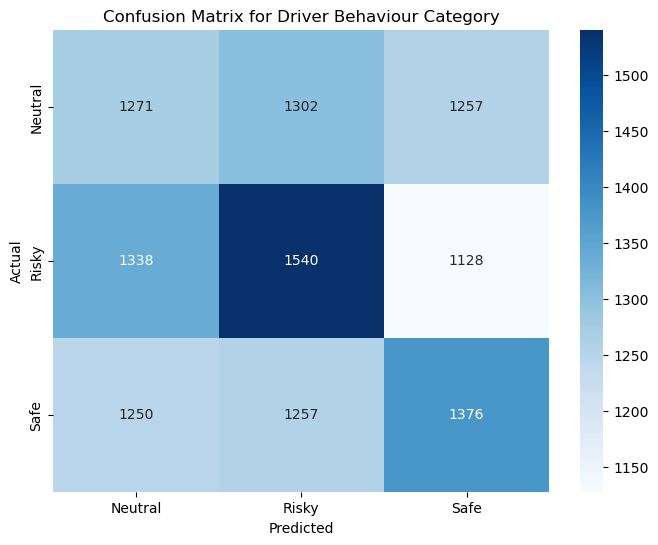


Accuracy for driver_behaviour_category prediction: 0.3573

RMSE for premium prediction: 0.4430


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Data Loading and Exploration
# Read the CSV file into a DataFrame
df_synthetic = pd.read_csv('synthetic_data_with_category.csv')

# Calculate 33rd and 66th percentiles of 'driver_behaviour'
percentile_33 = df_synthetic['driver_behaviour'].quantile(0.33)
percentile_66 = df_synthetic['driver_behaviour'].quantile(0.66)

# Create 'driver_behaviour_category' column
def categorize_driver_behaviour(behaviour):
    if behaviour <= percentile_33:
        return 'Safe'
    elif behaviour <= percentile_66:
        return 'Neutral'
    else:
        return 'Risky'

df_synthetic['driver_behaviour_category'] = df_synthetic['driver_behaviour'].apply(categorize_driver_behaviour)

# Print value counts and proportions
value_counts = df_synthetic['driver_behaviour_category'].value_counts()
proportions = df_synthetic['driver_behaviour_category'].value_counts(normalize=True) * 100

print("\nValue Counts of 'driver_behaviour_category':\n", value_counts.to_markdown(numalign="left", stralign="left"))
print("\nProportions of 'driver_behaviour_category':\n", proportions.to_markdown(numalign="left", stralign="left", floatfmt='.2f'))

# 2. Feature Engineering and Preprocessing
# Separate features and target for driver_behaviour_category prediction
X_cat = df_synthetic_new.drop(['driver_behaviour_category', 'driver_behaviour', 'premium', 'is_claim'], axis=1)
y_cat = df_synthetic_new['driver_behaviour_category']

# One-hot encode categorical features
X_cat_encoded = pd.get_dummies(X_cat)

# Split data into training and testing sets for driver_behaviour_category prediction
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X_cat_encoded, y_cat, test_size=0.2, random_state=42)

# Separate features and target for premium prediction
X_reg = df_synthetic_new.drop(['driver_behaviour_category', 'driver_behaviour', 'premium', 'is_claim'], axis=1)
y_reg = df_synthetic_new['premium']

# One-hot encode categorical features
X_reg_encoded = pd.get_dummies(X_reg)

# Split data into training and testing sets for premium prediction
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg_encoded, y_reg, test_size=0.2, random_state=42)

# 3. Model Development
# Initialize and train the Random Forest Classifier for driver_behaviour_category prediction
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_cat, y_train_cat)

# Initialize and train the Random Forest Regressor for premium prediction
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train_reg, y_train_reg)

# 4. Model Evaluation
# Predict on the test set for driver_behaviour_category
y_pred_cat = rf_classifier.predict(X_test_cat)

# Evaluate the classifier using accuracy
accuracy = accuracy_score(y_test_cat, y_pred_cat)

# Display a confusion matrix for driver_behaviour_category prediction
cm_cat = confusion_matrix(y_test_cat, y_pred_cat)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_cat, annot=True, fmt='d', cmap='Blues', xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Driver Behaviour Category')
plt.show()

# Predict on the test set for premium
y_pred_reg = rf_regressor.predict(X_test_reg)

# Evaluate the regressor using RMSE
rmse = mean_squared_error(y_test_reg, y_pred_reg, squared=False)

# Print the accuracy for driver_behaviour_category prediction and RMSE for premium prediction
print(f"\nAccuracy for driver_behaviour_category prediction: {accuracy:.4f}")
print(f"\nRMSE for premium prediction: {rmse:.4f}")


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Data Loading and Exploration (already done in previous code)

# 2. Feature Engineering and Preprocessing (already done in previous code)

# 3. Model Development and Hyperparameter Tuning
# 3.1 Classification (driver_behaviour_category)
# Define models and their hyperparameters
models_cat = {
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),  # Increase max_iter for convergence
    'SVM': SVC()
}

params_cat = {
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'Logistic Regression': {
        'C': [0.1, 1, 10],
        'penalty': ['l1', 'l2']
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    }
}

# Perform Grid Search for each model
best_models_cat = {}
for name, model in models_cat.items():
    print(f"\nPerforming Grid Search for {name}...")
    clf = GridSearchCV(model, params_cat[name], cv=5, scoring='accuracy')
    clf.fit(X_train_cat, y_train_cat)
    best_models_cat[name] = clf.best_estimator_
    print(f"Best parameters for {name}: {clf.best_params_}")
    print(f"Best accuracy for {name}: {clf.best_score_:.4f}")

# 3.2 Regression (premium)
# Define models and their hyperparameters
models_reg = {
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

params_reg = {
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }
}

# Perform Grid Search for each model
best_models_reg = {}
for name, model in models_reg.items():
    print(f"\nPerforming Grid Search for {name}...")
    reg = GridSearchCV(model, params_reg[name], cv=5, scoring='neg_mean_squared_error')
    reg.fit(X_train_reg, y_train_reg)
    best_models_reg[name] = reg.best_estimator_
    print(f"Best parameters for {name}: {reg.best_params_}")
    print(f"Best RMSE for {name}: {-reg.best_score_**0.5:.4f}")  # Convert negative MSE to RMSE

# 4. Model Evaluation on Test Set
# 4.1 Classification
for name, model in best_models_cat.items():
    y_pred_cat = model.predict(X_test_cat)
    accuracy = accuracy_score(y_test_cat, y_pred_cat)
    print(f"\nTest Accuracy for {name}: {accuracy:.4f}")

    # Display confusion matrix
    cm_cat = confusion_matrix(y_test_cat, y_pred_cat)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_cat, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for Driver Behaviour Category ({name})')
    plt.show()

# 4.2 Regression
for name, model in best_models_reg.items():
    y_pred_reg = model.predict(X_test_reg)
    rmse = mean_squared_error(y_test_reg, y_pred_reg, squared=False)
    print(f"\nTest RMSE for {name}: {rmse:.4f}")



Performing Grid Search for Random Forest...
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Best accuracy for Random Forest: 0.3643

Performing Grid Search for Gradient Boosting...
Best parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Best accuracy for Gradient Boosting: 0.3619

Performing Grid Search for Logistic Regression...
Best parameters for Logistic Regression: {'C': 1, 'penalty': 'l2'}
Best accuracy for Logistic Regression: 0.3365

Performing Grid Search for SVM...


In [6]:
    import pandas as pd
import numpy as np
import joblib
import plotly.graph_objects as go
import plotly.express as px
import streamlit as st
import shap
from sklearn.inspection import permutation_importance
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import threading

_lock = threading.Lock()

# Load models
claim_model = joblib.load('xgboost_model.pkl')
risk_model = joblib.load('best_driver_behaviour_model.pkl')
premium_model = joblib.load('best_premium_model.pkl')
driver_behavior_model_stage1 = joblib.load('driver_behavior_classifier_stage1.pkl')
driver_behavior_model_stage2 = joblib.load('driver_behavior_classifier_stage2.pkl')

# Load dataset for unique values and visualization
df = pd.read_csv('synthetic_data_with_safety_score.csv')

# Reference features for preprocessing
columns = list(df.columns)  # Ensure you have a list of feature names as they were used in model training

# Load preprocessor (this is the LabelEncoder for the target variable)
preprocessor = joblib.load('label_encoder.pkl') # Adjust path and method based on your actual preprocessing

# Function to preprocess new data
def preprocess_new_data(input_df):
    # Reference features that were used during model training
    expected_features = [
        'policy_tenure', 'age_of_car', 'age_of_policyholder', 'area_cluster',
        'population_density', 'make', 'segment', 'model', 'fuel_type', 'engine_type',
        'airbags', 'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
        'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
        'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
        'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
        'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger',
        'is_brake_assist', 'is_power_door_locks', 'is_central_locking',
        'is_power_steering', 'is_driver_seat_height_adjustable',
        'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert',
        'ncap_rating', 'max_torque_num', 'max_power_num'
    ]
    
    # Ensure all expected columns are present in the input
    for col in expected_features:
        if col not in input_df.columns:
            # Add missing columns with default values
            if input_df[col].dtype == 'object':
                input_df[col] = 'Unknown'
            else:
                input_df[col] = 0
    
    # Reorder columns to match the model's expectation
    input_df = input_df[expected_features]
    
    return input_df

# Example of using the preprocessing function
input_df = pd.DataFrame([user_input])
input_df = preprocess_new_data(input_df)

# Use the processed input for predictions
claim_risk_prediction = claim_model.predict(input_df)[0]
claim_risk_probability = claim_model.predict_proba(input_df)[0][1]

premium_prediction = calculate_premium(user_input)
driver_behavior_prediction = classify_driver_behavior(user_input)

# Select only the features expected by the model
input_df = input_df[expected_features]

# The rest of your code continues...

def calculate_premium(data):
    input_df = pd.DataFrame([data])
    input_preprocessed = preprocess_new_data(input_df)
    input_preprocessed = input_preprocessed[expected_features]
    premium_estimation = premium_model.predict(input_preprocessed)[0]
    premium_estimation = max(200, min(premium_estimation, 2000))  # Adjust bounds as needed
    return premium_estimation

# Classify driver behavior
def classify_driver_behavior(data):
    input_df = pd.DataFrame([data])
    input_preprocessed = preprocess_new_data(input_df)
    is_safe = driver_behavior_model_stage1.predict(input_preprocessed)[0]
    if is_safe == 0:  # Safe
        return 'Safe'
    else:  # Not Safe, proceed to Stage 2
        risk_level = driver_behavior_model_stage2.predict(input_preprocessed)[0]
        return 'Moderate' if risk_level == 0 else 'Risky'

# Determine safety and risk
def determine_safety_and_risk(claim_risk_probability):
    if claim_risk_probability < 0.3:
        safety_status = "Safe"
        risk_status = "Low Risk"
    elif claim_risk_probability < 0.7:
        safety_status = "Moderate"
        risk_status = "Moderate Risk"
    else:
        safety_status = "Risky"
        risk_status = "High Risk"
    return safety_status, risk_status

# Functions to create charts
def create_fig1(claim_risk_probability):
    return go.Figure(go.Indicator(
        mode="gauge+number",
        value=claim_risk_probability * 100,
        domain={'x': [0, 1], 'y': [0, 1]},
        title={'text': "Claim Risk"},
        gauge={'axis': {'range': [0, 100]}}
    ))

def create_fig2(premium_prediction):
    return px.bar(x=["Estimated Premium"], y=[premium_prediction], labels={'x': 'Metric', 'y': 'Value'}, title="Premium Estimate")

def create_fig3(driver_behavior_prediction):
    return go.Figure(go.Indicator(
        mode="gauge+number",
        value=0 if driver_behavior_prediction == 'Safe' else 100,
        domain={'x': [0, 1], 'y': [0, 1]},
        title={'text': "Driver Behavior"},
        gauge={'axis': {'range': [0, 100]}}
    ))

def create_fig4(risk_score):
    return px.scatter(x=['Risk Score'], y=[risk_score], size=[risk_score], labels={'x': 'Metric', 'y': 'Value'}, title="Risk Score")

def create_fig5(correlation_data):
    return px.imshow(correlation_data, text_auto=True, aspect="auto", title="Correlation Matrix")

def create_fig6(feature_importance_df):
    return px.bar(feature_importance_df, x='Feature', y='Importance', title="Feature Importance")

def create_fig7(claim_data):
    return px.histogram(claim_data, nbins=50, title="Claim Distribution")

def create_fig8(df):
    return px.scatter(df, x="age_of_car", y="is_claim", trendline="ols", title="Age of Car vs Claim")

# Streamlit interface
st.title("Enhanced UBI Dashboard")

# Sidebar inputs
st.sidebar.header("Driver Information")
user_input = {
    'policy_tenure': st.sidebar.number_input("Policy Tenure", min_value=0, max_value=50),
    'age_of_car': st.sidebar.number_input("Age of Car", min_value=0, max_value=30),
    'age_of_policyholder': st.sidebar.number_input("Age of Policyholder", min_value=18, max_value=100),
    'population_density': st.sidebar.number_input("Population Density", min_value=0, max_value=10000),
    'make': st.sidebar.selectbox("Make", df['make'].unique()),
    'segment': st.sidebar.selectbox("Segment", df['segment'].unique()),
    'model': st.sidebar.selectbox("Model", df['model'].unique()),
    'fuel_type': st.sidebar.selectbox("Fuel Type", df['fuel_type'].unique()),
    'airbags': st.sidebar.number_input("Number of Airbags", min_value=0, max_value=10),
    'is_esc': st.sidebar.selectbox("ESC (Electronic Stability Control)", [0, 1]),
    'is_adjustable_steering': st.sidebar.selectbox("Adjustable Steering", [0, 1]),
    'is_tpms': st.sidebar.selectbox("TPMS (Tire Pressure Monitoring System)", [0, 1]),
    'is_parking_sensors': st.sidebar.selectbox("Parking Sensors", [0, 1]),
    'is_parking_camera': st.sidebar.selectbox("Parking Camera", [0, 1]),
    'rear_brakes_type': st.sidebar.selectbox("Rear Brakes Type", df['rear_brakes_type'].unique()),
    'displacement': st.sidebar.number_input("Displacement (cc)", min_value=0, max_value=5000),
    'cylinder': st.sidebar.number_input("Number of Cylinders", min_value=0, max_value=16),
    'transmission_type': st.sidebar.selectbox("Transmission Type", df['transmission_type'].unique()),
    'gear_box': st.sidebar.number_input("Number of Gears", min_value=0, max_value=10),
    'steering_type': st.sidebar.selectbox("Steering Type", df['steering_type'].unique()),
    'turning_radius': st.sidebar.number_input("Turning Radius (m)", min_value=0.0, max_value=15.0),
    'length': st.sidebar.number_input("Length (mm)", min_value=0, max_value=5000),
    'width': st.sidebar.number_input("Width (mm)", min_value=0, max_value=3000),
    'height': st.sidebar.number_input("Height (mm)", min_value=0, max_value=3000),
    'gross_weight': st.sidebar.number_input("Gross Weight (kg)", min_value=0, max_value=5000),
    'is_front_fog_lights': st.sidebar.selectbox("Front Fog Lights", [0, 1]),
    'is_rear_window_wiper': st.sidebar.selectbox("Rear Window Wiper", [0, 1]),
    'is_rear_window_washer': st.sidebar.selectbox("Rear Window Washer", [0, 1]),
    'is_rear_window_defogger': st.sidebar.selectbox("Rear Window Defogger", [0, 1]),
    'is_brake_assist': st.sidebar.selectbox("Brake Assist", [0, 1]),
    'is_power_door_locks': st.sidebar.selectbox("Power Door Locks", [0, 1]),
    'is_central_locking': st.sidebar.selectbox("Central Locking", [0, 1]),
    'is_power_steering': st.sidebar.selectbox("Power Steering", [0, 1]),
    'is_driver_seat_height_adjustable': st.sidebar.selectbox("Driver Seat Height Adjustable", [0, 1]),
    'is_day_night_rear_view_mirror': st.sidebar.selectbox("Day/Night Rear View Mirror", [0, 1]),
    'is_ecw': st.sidebar.selectbox("ECW (Emergency Call Warning)", [0, 1]),
    'is_speed_alert': st.sidebar.selectbox("Speed Alert", [0, 1]),
    'ncap_rating': st.sidebar.selectbox("NCAP Rating", df['ncap_rating'].unique()),
    'area_cluster': st.sidebar.selectbox("Area Cluster", df['area_cluster'].unique()),
    'max_torque_num': st.sidebar.selectbox("Max Torque", df['max_torque_num'].unique()),
    'max_power_num': st.sidebar.selectbox("Max Power", df['max_power_num'].unique()),
    'engine_type': st.sidebar.selectbox("Engine Type", df['engine_type'].unique())
}
# Select only the features expected by the model
input_df = input_df[expected_features]

# Convert user input to dataframe and preprocess
input_df = pd.DataFrame([user_input])
input_df = preprocess_new_data(input_df)


premium_prediction = calculate_premium(user_input)
# Make predictions 
with st.spinner("Making predictions..."):
    claim_risk_prediction = claim_model.predict(input_df)[0]
    claim_risk_probability = claim_model.predict_proba(input_df)[0][1]

    premium_prediction = calculate_premium(user_input)
    driver_behavior_prediction = classify_driver_behavior(user_input)
    risk_score = risk_model.predict(input_df)[0]  # Use the new 'risk_model'
    safety_status, risk_status = determine_safety_and_risk(claim_risk_probability)

# Visualization section
st.header("Visualizations")

# Interactive feature selection for plots
st.subheader("Feature Selection for Visualization")
x_feature = st.selectbox("Select X-axis feature", options=df.columns, index=0)
y_feature = st.selectbox("Select Y-axis feature", options=df.columns, index=1)
chart_type = st.selectbox("Select Chart Type", options=['Histogram', 'Line'], index=0)

# Generate the selected plot
if chart_type == 'Histogram':
    fig = px.histogram(df, x=x_feature, title=f'Histogram of {x_feature}', labels={x_feature: x_feature})
elif chart_type == 'Line':
    fig = px.line(df, x=x_feature, y=y_feature, title=f'Line Chart of {x_feature} vs {y_feature}', labels={x_feature: x_feature, y_feature: y_feature})

st.plotly_chart(fig, use_container_width=True)

# Additional visualizations
st.subheader('Claim Distribution')
fig1 = create_fig1(claim_risk_probability)
st.plotly_chart(fig1, use_container_width=True)

st.subheader('NCAP Rating Distribution')
fig2 = px.histogram(df, x='ncap_rating', title='NCAP Rating Distribution', labels={'ncap_rating': 'NCAP Rating'})
st.plotly_chart(fig2, use_container_width=True)

st.subheader('Policy Tenure vs Age of Car')
fig3 = px.scatter(df, x='policy_tenure', y='age_of_car', title='Policy Tenure vs Age of Car', labels={'policy_tenure': 'Policy Tenure', 'age_of_car': 'Age of Car'})
st.plotly_chart(fig3, use_container_width=True)

st.subheader('Age of Policyholder Distribution')
fig4 = px.histogram(df, x='age_of_policyholder', title='Age of Policyholder Distribution', labels={'age_of_policyholder': 'Age of Policyholder'})
st.plotly_chart(fig4, use_container_width=True)

st.subheader('Fuel Type Distribution')
fig5 = px.histogram(df, x='fuel_type', title='Fuel Type Distribution', labels={'fuel_type': 'Fuel Type'})
st.plotly_chart(fig5, use_container_width=True)

st.subheader('Segment Distribution')
fig6 = px.histogram(df, x='segment', title='Segment Distribution', labels={'segment': 'Segment'})
st.plotly_chart(fig6, use_container_width=True)

st.subheader('Feature Importance in Claim Model')
if hasattr(claim_model, 'feature_importances_'):
    feature_importances = claim_model.feature_importances_
    sorted_idx = np.argsort(feature_importances)[::-1][:10]
    top_features = [columns[i] for i in sorted_idx]
    top_importances = feature_importances[sorted_idx]

    fig7 = go.Figure(data=[
        go.Bar(name='Feature Importance', x=top_features, y=top_importances)
    ])
    fig7.update_layout(title="Top 10 Feature Importances", xaxis_title="Feature", yaxis_title="Importance")
    st.plotly_chart(fig7, use_container_width=True)
else:
    st.warning("Feature importance not available for the current model type.")

# Final Layout Adjustments: Tabs for Better User Experience
st.subheader("Detailed Insights")
tab1, tab2, tab3, tab4 = st.tabs(["Claim Risk", "Premium", "Driver Behavior", "Model Comparison"])

selected_features = ['policy_tenure', 'age_of_car', 'age_of_policyholder', 'population_density', 'airbags']  # Define selected_features here

with tab1:
    st.plotly_chart(create_fig1(claim_risk_probability))
    st.plotly_chart(create_fig4(risk_score))

with tab2:
    st.plotly_chart(create_fig2(premium_prediction))
    st.plotly_chart(create_fig7(df['is_claim']))  # Use df['is_claim'] for claim distribution
    st.plotly_chart(create_fig8(df))

with tab3:
    st.plotly_chart(create_fig3(driver_behavior_prediction))
    st.plotly_chart(create_fig5(df[selected_features].corr()))

    if hasattr(claim_model, 'feature_importances_'):
        feature_importances = claim_model.feature_importances_
        feature_importance_df = pd.DataFrame({'Feature': columns, 'Importance': feature_importances})
        feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
        st.plotly_chart(create_fig6(feature_importance_df))
    else:
        st.warning("Feature importances are not available for this model.")

with tab4:
    # Save the results in a DataFrame for markdown display
    results_df = pd.DataFrame({
        'Claim Risk Prediction': [claim_risk_prediction],
        'Claim Risk Probability': [f"{claim_risk_probability:.2f}"],
        'Premium Estimation': [f"£{premium_prediction:.2f}"],
        'Driver Behavior Prediction': [driver_behavior_prediction],
        'Risk Score': [risk_score],
        'Safety Status': [safety_status],
        'Risk Status': [risk_status]
    })
    st.markdown(results_df.to_markdown(index=False, numalign="left", stralign="left"))

# Save Results
def save_results():
    with _lock:
        with st.spinner("Saving results..."):
            pdf_data = f"""
            <h1>Insurance Results</h1>
            <p><strong>Claim Risk Prediction:</strong> {claim_risk_prediction}</p>
            <p><strong>Claim Risk Probability:</strong> {claim_risk_probability:.2f}</p>
            <p><strong>Premium Estimation:</strong> £{premium_prediction:.2f}</p>
            <p><strong>Driver Behavior Prediction:</strong> {driver_behavior_prediction}</p>
            <p><strong>Risk Score:</strong> {risk_score}</p>
            <p><strong>Safety Status:</strong> {safety_status}</p>
            <p><strong>Risk Status:</strong> {risk_status}</p>
            """
            pdfkit.from_string(pdf_data, 'Insurance_Results.pdf')
            st.success("Results saved as Insurance_Results.pdf")

st.button("Save Results", on_click=save_results)

# Show summary and explanations
st.header("Summary and Explanations")
st.write("**Claim Risk Prediction:**")
st.write(f"- The model predicts a claim risk of **{claim_risk_prediction}** with a probability of **{claim_risk_probability:.2f}**.")
st.write("**Premium Estimation:**")
st.write(f"- The estimated insurance premium is **£{premium_prediction:.2f}**.")
st.write("**Driver Behavior Prediction:**")
st.write(f"- The driver behavior is predicted to be **{driver_behavior_prediction.capitalize()}**.")
st.write("**Risk Score:**")
st.write(f"- The risk score for this driver is **{risk_score}**.")
st.write("**Safety Status:**")
st.write(f"- The safety status of the driver is **{safety_status}**.")
st.write("**Risk Status:**")
st.write(f"- The risk status of the driver is **{risk_status}**.")


IndentationError: expected an indented block after function definition on line 32 (3234753804.py, line 34)

In [30]:
import pandas as pd
import numpy as np
import joblib
import plotly.graph_objects as go
import plotly.express as px
import streamlit as st
import pdfkit
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import threading

_lock = threading.Lock()

# Load models
claim_model = joblib.load('xgboost_model.pkl')
risk_model = joblib.load('best_driver_behaviour_model.pkl')
premium_model = joblib.load('best_premium_model.pkl')
driver_behavior_model_stage1 = joblib.load('driver_behavior_classifier_stage1.pkl')
driver_behavior_model_stage2 = joblib.load('driver_behavior_classifier_stage2.pkl')

# Load dataset for unique values and visualization
df = pd.read_csv('synthetic_data_with_safety_score.csv')

# Reference features for preprocessing
expected_features = [
    'policy_tenure', 'age_of_car', 'age_of_policyholder', 'area_cluster',
    'population_density', 'make', 'segment', 'model', 'fuel_type',
    'engine_type', 'airbags', 'is_esc', 'is_adjustable_steering', 'is_tpms',
    'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type', 'displacement',
    'cylinder', 'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
    'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights', 'is_rear_window_wiper',
    'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
    'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable',
    'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert', 'ncap_rating',
    'max_torque_num', 'max_power_num'
]

# Load preprocessor (this is the LabelEncoder for the target variable)
preprocessor = joblib.load('label_encoder.pkl')  # Adjust path and method based on your actual preprocessing

# Function to preprocess new data
def preprocess_new_data(input_df):
    # Ensure all expected columns are present in the input
    for col in expected_features:
        if col not in input_df.columns:
            if col in categorical_features:  # For categorical features
                input_df[col] = 'Unknown'
            else:  # For numerical features
                input_df[col] = 0
    
    # Reorder columns to match the model's expectation
    input_df = input_df[expected_features]
    
    # Apply any additional preprocessing steps such as scaling or encoding
    input_df_transformed = preprocessor.transform(input_df)  # Using preprocessor to match training data transformations
    
    return input_df_transformed

def validate_input_data(input_df):
    # Check for missing columns
    missing_features = set(expected_features) - set(input_df.columns)
    if missing_features:
        raise ValueError(f"Missing columns: {missing_features}")
    
    # Check for extra columns
    extra_features = set(input_df.columns) - set(expected_features)
    if extra_features:
        print(f"Warning: Extra columns present: {extra_features}")
    
    # Check for column order mismatch
    input_df = input_df[expected_features]
    
    return input_df

# Example of using the preprocessing function
def calculate_premium(data):
    input_df = pd.DataFrame([data])
    input_preprocessed = preprocess_new_data(input_df)
    premium_estimation = premium_model.predict(input_preprocessed)[0]
    premium_estimation = max(200, min(premium_estimation, 2000))  # Adjust bounds as needed
    return premium_estimation

# Classify driver behavior
def classify_driver_behavior(data):
    input_df = pd.DataFrame([data])
    input_preprocessed = preprocess_new_data(input_df)
    is_safe = driver_behavior_model_stage1.predict(input_preprocessed)[0]
    if is_safe == 0:  # Safe
        return 'Safe'
    else:  # Not Safe, proceed to Stage 2
        risk_level = driver_behavior_model_stage2.predict(input_preprocessed)[0]
        return 'Moderate' if risk_level == 0 else 'Risky'

# Determine safety and risk
def determine_safety_and_risk(claim_risk_probability):
    if claim_risk_probability < 0.3:
        safety_status = "Safe"
        risk_status = "Low Risk"
    elif claim_risk_probability < 0.7:
        safety_status = "Moderate"
        risk_status = "Moderate Risk"
    else:
        safety_status = "Risky"
        risk_status = "High Risk"
    return safety_status, risk_status

# Functions to create charts
def create_fig1(claim_risk_probability):
    return go.Figure(go.Indicator(
        mode="gauge+number",
        value=claim_risk_probability * 100,
        domain={'x': [0, 1], 'y': [0, 1]},
        title={'text': "Claim Risk"},
        gauge={'axis': {'range': [0, 100]}}
    ))

def create_fig2(premium_prediction):
    return px.bar(x=["Estimated Premium"], y=[premium_prediction], labels={'x': 'Metric', 'y': 'Value'}, title="Premium Estimate")

def create_fig3(driver_behavior_prediction):
    return go.Figure(go.Indicator(
        mode="gauge+number",
        value=0 if driver_behavior_prediction == 'Safe' else 100,
        domain={'x': [0, 1], 'y': [0, 1]},
        title={'text': "Driver Behavior"},
        gauge={'axis': {'range': [0, 100]}}
    ))

def create_fig4(risk_score):
    return px.scatter(x=['Risk Score'], y=[risk_score], size=[risk_score], labels={'x': 'Metric', 'y': 'Value'}, title="Risk Score")

def create_fig5(correlation_data):
    return px.imshow(correlation_data, text_auto=True, aspect="auto", title="Correlation Matrix")

def create_fig6(feature_importance_df):
    return px.bar(feature_importance_df, x='Feature', y='Importance', title="Feature Importance")

def create_fig7(claim_data):
    return px.histogram(claim_data, nbins=50, title="Claim Distribution")

def create_fig8(df):
    return px.scatter(df, x="age_of_car", y="is_claim", trendline="ols", title="Age of Car vs Claim")

# Streamlit interface
st.title("Enhanced UBI Dashboard")

# Sidebar inputs
st.sidebar.header("Driver Information")
user_input = {
    'policy_tenure': st.sidebar.number_input("Policy Tenure", min_value=0, max_value=50),
    'age_of_car': st.sidebar.number_input("Age of Car", min_value=0, max_value=30),
    'age_of_policyholder': st.sidebar.number_input("Age of Policyholder", min_value=18, max_value=100),
    'area_cluster': st.sidebar.selectbox("Area Cluster", df['area_cluster'].unique()),
    'population_density': st.sidebar.number_input("Population Density", min_value=0, max_value=10000),
    'make': st.sidebar.selectbox("Make", df['make'].unique()),
    'segment': st.sidebar.selectbox("Segment", df['segment'].unique()),
    'model': st.sidebar.selectbox("Model", df['model'].unique()),
    'fuel_type': st.sidebar.selectbox("Fuel Type", df['fuel_type'].unique()),
    'airbags': st.sidebar.number_input("Number of Airbags", min_value=0, max_value=10),
    'is_esc': st.sidebar.selectbox("ESC (Electronic Stability Control)", [0, 1]),
    'is_adjustable_steering': st.sidebar.selectbox("Adjustable Steering", [0, 1]),
    'is_tpms': st.sidebar.selectbox("TPMS (Tire Pressure Monitoring System)", [0, 1]),
    'is_parking_sensors': st.sidebar.selectbox("Parking Sensors", [0, 1]),
    'is_parking_camera': st.sidebar.selectbox("Parking Camera", [0, 1]),
    'rear_brakes_type': st.sidebar.selectbox("Rear Brakes Type", df['rear_brakes_type'].unique()),
    'displacement': st.sidebar.number_input("Displacement (cc)", min_value=0, max_value=5000),
    'cylinder': st.sidebar.number_input("Number of Cylinders", min_value=0, max_value=16),
    'transmission_type': st.sidebar.selectbox("Transmission Type", df['transmission_type'].unique()),
    'gear_box': st.sidebar.number_input("Number of Gears", min_value=0, max_value=10),
    'steering_type': st.sidebar.selectbox("Steering Type", df['steering_type'].unique()),
    'turning_radius': st.sidebar.number_input("Turning Radius (m)", min_value=0.0, max_value=15.0),
    'length': st.sidebar.number_input("Length (mm)", min_value=0, max_value=5000),
    'width': st.sidebar.number_input("Width (mm)", min_value=0, max_value=3000),
    'height': st.sidebar.number_input("Height (mm)", min_value=0, max_value=3000),
    'gross_weight': st.sidebar.number_input("Gross Weight (kg)", min_value=0, max_value=5000),
    'is_front_fog_lights': st.sidebar.selectbox("Front Fog Lights", [0, 1]),
    'is_rear_window_wiper': st.sidebar.selectbox("Rear Window Wiper", [0, 1]),
    'is_rear_window_washer': st.sidebar.selectbox("Rear Window Washer", [0, 1]),
    'is_rear_window_defogger': st.sidebar.selectbox("Rear Window Defogger", [0, 1]),
    'is_brake_assist': st.sidebar.selectbox("Brake Assist", [0, 1]),
    'is_power_door_locks': st.sidebar.selectbox("Power Door Locks", [0, 1]),
    'is_central_locking': st.sidebar.selectbox("Central Locking", [0, 1]),
    'is_power_steering': st.sidebar.selectbox("Power Steering", [0, 1]),
    'is_driver_seat_height_adjustable': st.sidebar.selectbox("Driver Seat Height Adjustable", [0, 1]),
    'is_day_night_rear_view_mirror': st.sidebar.selectbox("Day/Night Rear View Mirror", [0, 1]),
    'is_ecw': st.sidebar.selectbox("ECW (Emergency Call System)", [0, 1]),
    'is_speed_alert': st.sidebar.selectbox("Speed Alert", [0, 1]),
    'ncap_rating': st.sidebar.number_input("NCAP Rating", min_value=0, max_value=5),
    'max_torque_num': st.sidebar.selectbox("Max Torque", df['max_torque_num'].unique()),
    'max_power_num': st.sidebar.selectbox("Max Power", df['max_power_num'].unique()),
    'engine_type': st.sidebar.selectbox("Engine Type", df['engine_type'].unique())
}

# ... other parts of your code ...
# Convert user input to data frame
input_df = pd.DataFrame([user_input])

# Validate and preprocess input data
try:
    input_df = validate_input_data(input_df)
    input_df = preprocess_new_data(input_df)
except ValueError as e:
    st.error(f"Error with input data: {e}")
    st.stop()  # Stop execution if there are issues with input data

# Predict and classify
premium_estimate = calculate_premium(user_input)
claim_risk_probability = risk_model.predict_proba(input_df)[0, 1]
driver_behavior = classify_driver_behavior(user_input)
safety_status, risk_status = determine_safety_and_risk(claim_risk_probability)

#pause
# Convert user input to dataframe and preprocess
#input_df = pd.DataFrame([user_input])
#input_df = preprocess_new_data(input_df)

# Check and align column names/order for premium_model
#print("Expected columns for premium_model:", premium_model.feature_names_in_)
#print("Actual columns in input_df:", input_df.columns.tolist())

# Reorder or drop columns as needed based on the comparison above
# For example, if the order is different:
input_df = input_df[premium_model.feature_names_in_.tolist()]

# ... rest of your prediction and visualization code ...

# Predict and classify
premium_estimate = calculate_premium(user_input)
claim_risk_probability = risk_model.predict_proba(input_df)[0, 1]
driver_behavior = classify_driver_behavior(user_input)
safety_status, risk_status = determine_safety_and_risk(claim_risk_probability)

# Create visualizations
fig1 = create_fig1(claim_risk_probability)
fig2 = create_fig2(premium_estimate)
fig3 = create_fig3(driver_behavior)
fig4 = create_fig4(claim_risk_probability)
fig5 = create_fig5(df.corr())  # Ensure df.corr() is used for correlation matrix
fig6 = create_fig6(pd.DataFrame({'Feature': [], 'Importance': []}))  # Placeholder, adjust as needed
fig7 = create_fig7(df)  # Replace with actual claim data
fig8 = create_fig8(df)  # Replace with actual claim data

# Display results
st.subheader("Premium Estimate")
st.write(f"Estimated Premium: ${premium_estimate:.2f}")
st.plotly_chart(fig1)
st.plotly_chart(fig2)
st.subheader("Driver Behavior")
st.write(f"Driver Behavior: {driver_behavior}")
st.plotly_chart(fig3)
st.subheader("Safety and Risk Assessment")
st.write(f"Safety Status: {safety_status}")
st.write(f"Risk Status: {risk_status}")
st.plotly_chart(fig4)
st.plotly_chart(fig5)
st.plotly_chart(fig6)
st.plotly_chart(fig7)
st.plotly_chart(fig8)

# Generate and save PDF report
def save_pdf_report():
    with _lock:
        html = st.markdown(st.get_markdown(), unsafe_allow_html=True)
        pdfkit.from_string(html, 'report.pdf')

if st.button('Generate PDF Report'):
    save_pdf_report()
    st.success("PDF report has been generated!")


ValueError: y should be a 1d array, got an array of shape (1, 42) instead.

In [24]:
print(input_df)

   policy_tenure  age_of_car  age_of_policyholder  area_cluster  \
0              0           0                   18             0   

   population_density  make  segment  model  fuel_type  airbags  ...  \
0                   0     1        0      0          0        0  ...   

   is_central_locking  is_power_steering  is_driver_seat_height_adjustable  \
0                   0                  0                                 0   

   is_day_night_rear_view_mirror  is_ecw  is_speed_alert  ncap_rating  \
0                              0       0               0            0   

   max_torque_num  max_power_num  engine_type  
0            60.0          40.36            6  

[1 rows x 42 columns]


In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd
import numpy as np
import joblib
import plotly.graph_objects as go
import plotly.express as px
import streamlit as st
import pdfkit
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import threading

_lock = threading.Lock()

# Load models
claim_model = joblib.load('xgboost_model.pkl')
risk_model = joblib.load('best_driver_behaviour_model.pkl')
premium_model = joblib.load('best_premium_model.pkl')
driver_behavior_model_stage1 = joblib.load('driver_behavior_classifier_stage1.pkl')
driver_behavior_model_stage2 = joblib.load('driver_behavior_classifier_stage2.pkl')

# Load dataset for unique values and visualization
df = pd.read_csv('synthetic_data_with_safety_score.csv')

# Reference features for preprocessing
expected_features = [
    'policy_tenure', 'age_of_car', 'age_of_policyholder', 'area_cluster',
    'population_density', 'make', 'segment', 'model', 'fuel_type',
    'engine_type', 'airbags', 'is_esc', 'is_adjustable_steering', 'is_tpms',
    'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type', 'displacement',
    'cylinder', 'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
    'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights', 'is_rear_window_wiper',
    'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
    'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable',
    'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert', 'ncap_rating',
    'max_torque_num', 'max_power_num'
]

# Load preprocessor (this is the LabelEncoder for the target variable)
preprocessor = joblib.load('label_encoder.pkl')  # Adjust path and method based on your actual preprocessing

# Example of using the preprocessing function
def calculate_premium(data):
    input_df = pd.DataFrame([data])
    input_preprocessed = preprocess_new_data(input_df)
    premium_estimation = premium_model.predict(input_preprocessed)[0]
    premium_estimation = max(200, min(premium_estimation, 2000))  # Adjust bounds as needed
    return premium_estimation

# Classify driver behavior
def classify_driver_behavior(data):
    input_df = pd.DataFrame([data])
    input_preprocessed = preprocess_new_data(input_df)
    is_safe = driver_behavior_model_stage1.predict(input_preprocessed)[0]
    if is_safe == 0:  # Safe
        return 'Safe'
    else:  # Not Safe, proceed to Stage 2
        risk_level = driver_behavior_model_stage2.predict(input_preprocessed)[0]
        return 'Moderate' if risk_level == 0 else 'Risky'

# Determine safety and risk
def determine_safety_and_risk(claim_risk_probability):
    if claim_risk_probability < 0.3:
        safety_status = "Safe"
        risk_status = "Low Risk"
    elif claim_risk_probability < 0.7:
        safety_status = "Moderate"
        risk_status = "Moderate Risk"
    else:
        safety_status = "Risky"
        risk_status = "High Risk"
    return safety_status, risk_status

# Functions to create charts
def create_fig1(claim_risk_probability):
    return go.Figure(go.Indicator(
        mode="gauge+number",
        value=claim_risk_probability * 100,
        domain={'x': [0, 1], 'y': [0, 1]},
        title={'text': "Claim Risk"},
        gauge={'axis': {'range': [0, 100]}}
    ))

def create_fig2(premium_prediction):
    return px.bar(x=["Estimated Premium"], y=[premium_prediction], labels={'x': 'Metric', 'y': 'Value'}, title="Premium Estimate")

def create_fig3(driver_behavior_prediction):
    return go.Figure(go.Indicator(
        mode="gauge+number",
        value=0 if driver_behavior_prediction == 'Safe' else 100,
        domain={'x': [0, 1], 'y': [0, 1]},
        title={'text': "Driver Behavior"},
        gauge={'axis': {'range': [0, 100]}}
    ))

def create_fig4(risk_score):
    return px.scatter(x=['Risk Score'], y=[risk_score], size=[risk_score], labels={'x': 'Metric', 'y': 'Value'}, title="Risk Score")

def create_fig5(correlation_data):
    return px.imshow(correlation_data, text_auto=True, aspect="auto", title="Correlation Matrix")

def create_fig6(feature_importance_df):
    return px.bar(feature_importance_df, x='Feature', y='Importance', title="Feature Importance")

def create_fig7(claim_data):
    return px.histogram(claim_data, nbins=50, title="Claim Distribution")

def create_fig8(df):
    return px.scatter(df, x="age_of_car", y="is_claim", trendline="ols", title="Age of Car vs Claim")

# Define numerical and categorical features
categorical_features = [
    'area_cluster', 'make', 'segment', 'model', 'fuel_type', 'rear_brakes_type',
    'transmission_type', 'steering_type', 'engine_type'
]
numerical_features = [
    'policy_tenure', 'age_of_car', 'age_of_policyholder', 'population_density',
    'airbags', 'displacement', 'cylinder', 'gear_box', 'turning_radius',
    'length', 'width', 'height', 'gross_weight', 'ncap_rating', 'max_torque_num', 'max_power_num'
]

# Preprocessing pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Example: Fitting the preprocessor
# This should be done once on your training data
X_train = df[expected_features]  # Assuming this is your training data
preprocessor.fit(X_train)

def preprocess_new_data(input_df):
    # Ensure all expected columns are present in the input
    for col in expected_features:
        if col not in input_df.columns:
            if col in categorical_features:  # For categorical features
                input_df[col] = 'Unknown'
            else:  # For numerical features
                input_df[col] = 0
    
    # Reorder columns to match the model's expectation
    input_df = input_df[expected_features]
    
    # Apply preprocessing
    input_df_transformed = preprocessor.transform(input_df)
    
    return input_df_transformed

def calculate_premium(data):
    input_df = pd.DataFrame([data])
    input_preprocessed = preprocess_new_data(input_df)
    premium_estimation = premium_model.predict(input_preprocessed)[0]
    premium_estimation = max(200, min(premium_estimation, 2000))  # Adjust bounds as needed
    return premium_estimation

# Convert user input to DataFrame
input_df = pd.DataFrame([user_input])

# Validate and preprocess input data
try:
    input_df = validate_input_data(input_df)
    input_df = preprocess_new_data(input_df)
except ValueError as e:
    st.error(f"Error with input data: {e}")
    st.stop()  # Stop execution if there are issues with input data

# Predict and classify
premium_estimate = calculate_premium(user_input)
claim_risk_probability = risk_model.predict_proba(input_df)[0, 1]
driver_behavior = classify_driver_behavior(user_input)
safety_status, risk_status = determine_safety_and_risk(claim_risk_probability)

# Create visualizations
fig1 = create_fig1(claim_risk_probability)
fig2 = create_fig2(premium_estimate)
fig3 = create_fig3(driver_behavior)
fig4 = create_fig4(claim_risk_probability)
fig5 = create_fig5(df.corr())  # Ensure df.corr() is used for correlation matrix
fig6 = create_fig6(pd.DataFrame({'Feature': [], 'Importance': []}))  # Placeholder, adjust as needed
fig7 = create_fig7(df)  # Replace with actual claim data
fig8 = create_fig8(df)  # Replace with actual claim data

# Display results
st.subheader("Premium Estimate")
st.write(f"Estimated Premium: ${premium_estimate:.2f}")
st.plotly_chart(fig1)
st.plotly_chart(fig2)
st.subheader("Driver Behavior")
st.write(f"Driver Behavior: {driver_behavior}")
st.plotly_chart(fig3)
st.subheader("Safety and Risk Assessment")
st.write(f"Safety Status: {safety_status}")
st.write(f"Risk Status: {risk_status}")
st.plotly_chart(fig4)
st.plotly_chart(fig5)
st.plotly_chart(fig6)
st.plotly_chart(fig7)
st.plotly_chart(fig8)

# Generate and save PDF report
def save_pdf_report():
    with _lock:
        html = st.markdown(st.get_markdown(), unsafe_allow_html=True)
        pdfkit.from_string(html, 'report.pdf')

if st.button('Generate PDF Report'):
    save_pdf_report()
    st.success("PDF report has been generated!")


C:\Users\JOELM\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


ValueError: X has 98 features, but RandomForestRegressor is expecting 42 features as input.